In [594]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats

In [596]:
baseball = pd.read_csv('C:/Users/aleja/downloads/game_logs.csv')
baseball_data = baseball.tail(1000)

MemoryError: Unable to allocate array with shape (171907,) and data type object

In [3]:
baseball.shape

(171907, 161)

In [4]:
baseball.isnull().sum()

date                       0
number_of_game             0
day_of_week                0
v_name                     0
v_league                   0
                       ...  
h_player_9_id          31069
h_player_9_name        31069
h_player_9_def_pos     31069
additional_info       170451
acquisition_info       31066
Length: 161, dtype: int64

In [ ]:
#baseball_data = baseball.sample(n=10000)
baseball_data = baseball_data.reset_index().drop(columns='index')
baseball_data

In [6]:
#going to drop them for now
players_list_to_drop = []
fea = ['name', 'def_pos', 'id']
for n in range(1, 10):
    for m in range(3):
        players_list_to_drop.extend(['h_player_'+str(n)+'_'+fea[m], 'v_player_'+str(n)+'_'+fea[m]])
players_list_to_drop

['h_player_1_name',
 'v_player_1_name',
 'h_player_1_def_pos',
 'v_player_1_def_pos',
 'h_player_1_id',
 'v_player_1_id',
 'h_player_2_name',
 'v_player_2_name',
 'h_player_2_def_pos',
 'v_player_2_def_pos',
 'h_player_2_id',
 'v_player_2_id',
 'h_player_3_name',
 'v_player_3_name',
 'h_player_3_def_pos',
 'v_player_3_def_pos',
 'h_player_3_id',
 'v_player_3_id',
 'h_player_4_name',
 'v_player_4_name',
 'h_player_4_def_pos',
 'v_player_4_def_pos',
 'h_player_4_id',
 'v_player_4_id',
 'h_player_5_name',
 'v_player_5_name',
 'h_player_5_def_pos',
 'v_player_5_def_pos',
 'h_player_5_id',
 'v_player_5_id',
 'h_player_6_name',
 'v_player_6_name',
 'h_player_6_def_pos',
 'v_player_6_def_pos',
 'h_player_6_id',
 'v_player_6_id',
 'h_player_7_name',
 'v_player_7_name',
 'h_player_7_def_pos',
 'v_player_7_def_pos',
 'h_player_7_id',
 'v_player_7_id',
 'h_player_8_name',
 'v_player_8_name',
 'h_player_8_def_pos',
 'v_player_8_def_pos',
 'h_player_8_id',
 'v_player_8_id',
 'h_player_9_name',
 'v_

In [ ]:
baseball_data.drop(columns=players_list_to_drop, inplace=True)

In [ ]:
baseball_data.drop(columns=['winning_rbi_batter_id', 'winning_rbi_batter_id_name', 'additional_info', 'acquisition_info'], inplace=True)

In [9]:
list(baseball_data.columns)

['date',
 'number_of_game',
 'day_of_week',
 'v_name',
 'v_league',
 'v_game_number',
 'h_name',
 'h_league',
 'h_game_number',
 'v_score',
 'h_score',
 'length_outs',
 'day_night',
 'completion',
 'forefeit',
 'protest',
 'park_id',
 'attendance',
 'length_minutes',
 'v_line_score',
 'h_line_score',
 'v_at_bats',
 'v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_rbi',
 'v_sacrifice_hits',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_caught_stealing',
 'v_grounded_into_double',
 'v_first_catcher_interference',
 'v_left_on_base',
 'v_pitchers_used',
 'v_individual_earned_runs',
 'v_team_earned_runs',
 'v_wild_pitches',
 'v_balks',
 'v_putouts',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'v_triple_plays',
 'h_at_bats',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_rbi',
 'h_sacrifice_hits',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_stri

In [ ]:
baseball_data['h_starting_pitcher_name'].value_counts()

In [11]:
umpires_cols, id_cols = [], []
for col in list(baseball_data.columns):
    if 'umpire' in col:
        umpires_cols.append(col)
    elif 'id' in col:
        id_cols.append(col)
id_cols

['park_id',
 'v_individual_earned_runs',
 'h_individual_earned_runs',
 'v_manager_id',
 'h_manager_id',
 'winning_pitcher_id',
 'losing_pitcher_id',
 'saving_pitcher_id',
 'v_starting_pitcher_id',
 'h_starting_pitcher_id']

In [12]:
umpires_cols.remove('hp_umpire_name')
umpires_cols

['hp_umpire_id',
 '1b_umpire_id',
 '1b_umpire_name',
 '2b_umpire_id',
 '2b_umpire_name',
 '3b_umpire_id',
 '3b_umpire_name',
 'lf_umpire_id',
 'lf_umpire_name',
 'rf_umpire_id',
 'rf_umpire_name']

In [592]:
baseball_data.drop(columns=umpires_cols, inplace=True)
baseball_data.drop(columns=id_cols, inplace=True)

KeyError: "['hp_umpire_id' '1b_umpire_id' '1b_umpire_name' '2b_umpire_id'\n '2b_umpire_name' '3b_umpire_id' '3b_umpire_name' 'lf_umpire_id'\n 'lf_umpire_name' 'rf_umpire_id' 'rf_umpire_name'] not found in axis"

In [14]:
list(baseball_data.columns)

['date',
 'number_of_game',
 'day_of_week',
 'v_name',
 'v_league',
 'v_game_number',
 'h_name',
 'h_league',
 'h_game_number',
 'v_score',
 'h_score',
 'length_outs',
 'day_night',
 'completion',
 'forefeit',
 'protest',
 'attendance',
 'length_minutes',
 'v_line_score',
 'h_line_score',
 'v_at_bats',
 'v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_rbi',
 'v_sacrifice_hits',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_caught_stealing',
 'v_grounded_into_double',
 'v_first_catcher_interference',
 'v_left_on_base',
 'v_pitchers_used',
 'v_team_earned_runs',
 'v_wild_pitches',
 'v_balks',
 'v_putouts',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'v_triple_plays',
 'h_at_bats',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_rbi',
 'h_sacrifice_hits',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_caught_st

In [15]:
baseball_data.isnull().sum().value_counts()

0        76
1         2
10000     1
9993      1
9988      1
2         1
dtype: int64

In [16]:
many_nulls = []
for i in range(len(baseball_data.isnull().sum())):
    if baseball_data.isnull().sum()[i] == 9993 or baseball_data.isnull().sum()[i] == 9988 or baseball_data.isnull().sum()[i] == 10000:
        many_nulls.append(i)
many_nulls

[13, 14, 15]

In [17]:
l_many_nulls = [pd.DataFrame(baseball_data.isnull().sum()).reset_index().iloc[i]['index'] for i in many_nulls]
l_many_nulls

['completion', 'forefeit', 'protest']

In [18]:
baseball_data.drop(columns=l_many_nulls, inplace=True)

In [19]:
many_nulls2 = []
for i in range(len(baseball_data.isnull().sum())):
    if baseball_data.isnull().sum()[i] == 2 or baseball_data.isnull().sum()[i] == 1:
        many_nulls2.append(i)
many_nulls2

[13, 74, 75]

In [20]:
l_many_nulls2 = [pd.DataFrame(baseball_data.isnull().sum()).reset_index().iloc[i]['index'] for i in many_nulls2]
l_many_nulls2

['attendance', 'winning_pitcher_name', 'losing_pitcher_name']

In [21]:
baseball_data.dropna(subset=l_many_nulls2, inplace=True)

In [22]:
baseball_data.isnull().sum().value_counts()

0    79
dtype: int64

In [23]:
baseball_data['saving_pitcher_name'].value_counts()

(none)             4751
Craig Kimbrel       174
Kenley Jansen       155
Mark Melancon       147
Aroldis Chapman     146
                   ... 
Dan Jennings          1
Bryan Morris          1
Shae Simmons          1
A.J. Cole             1
Matt Barnes           1
Name: saving_pitcher_name, Length: 341, dtype: int64

In [24]:
baseball_data.shape

(9997, 79)

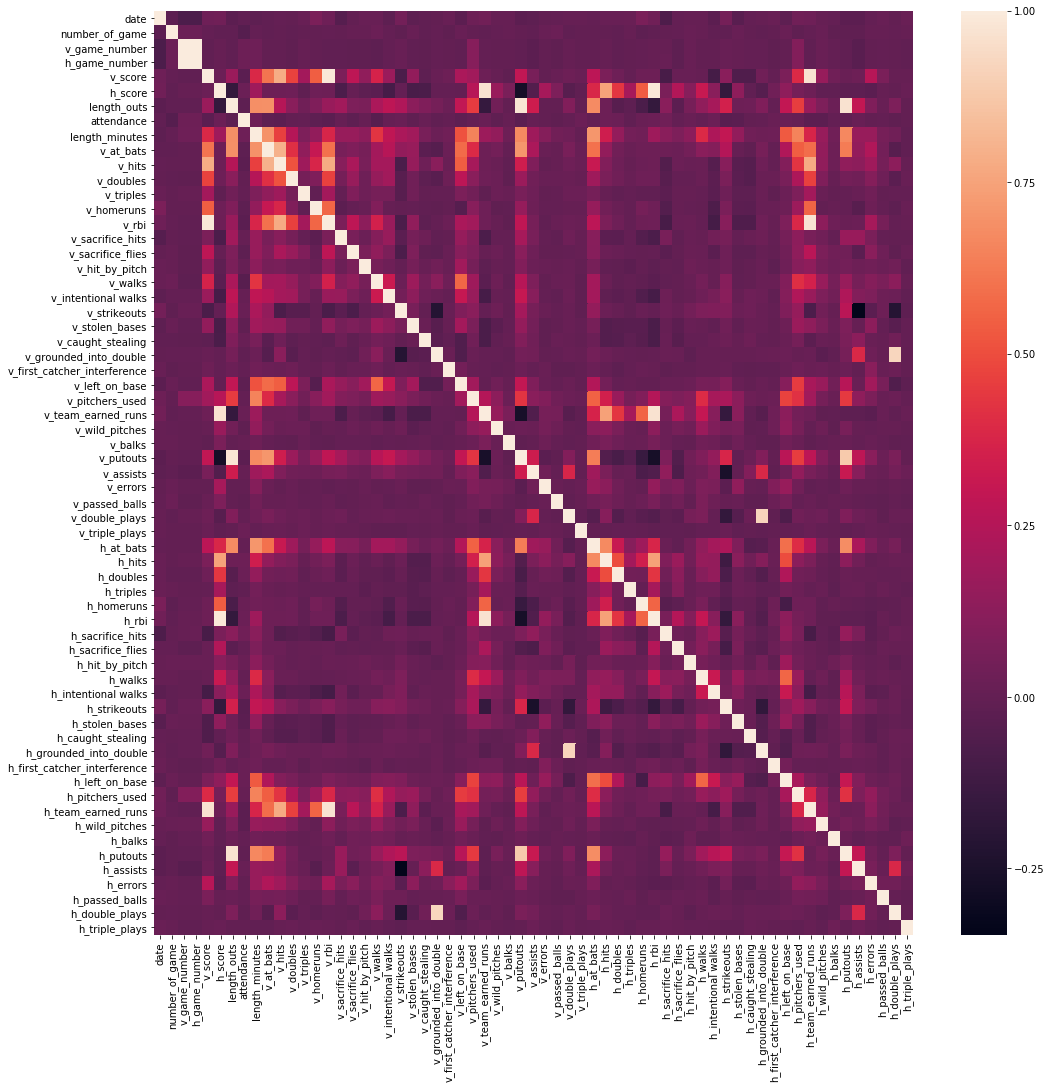

In [25]:
plt.figure(figsize=(17.0, 17.0))
sns.heatmap(baseball_data.corr())

In [26]:
#some columns are being dropped due to positive correlations between them

In [27]:
baseball_data.drop(columns='v_game_number', inplace=True)

In [28]:
baseball_data.drop(columns=['v_grounded_into_double', 'v_putouts', 'h_grounded_into_double', 'h_rbi', 'v_grounded_into_double', 'h_sacrifice_hits', 'v_sacrifice_hits'], inplace=True)

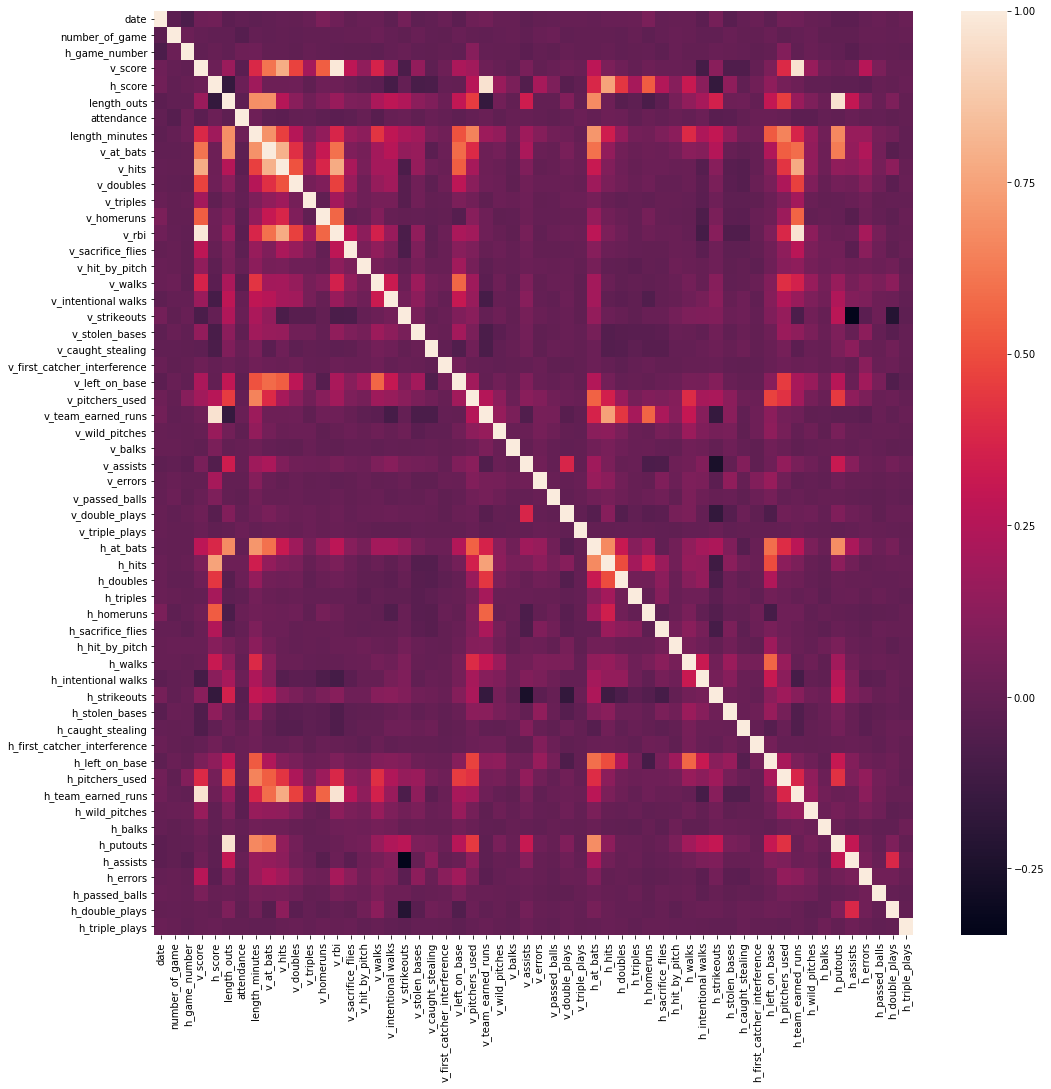

In [29]:
plt.figure(figsize=(17.0, 17.0))
sns.heatmap(baseball_data.corr())

In [30]:
baseball_data.drop(columns=['v_team_earned_runs', 'h_team_earned_runs', 'length_outs', 'v_rbi', 'h_putouts'], inplace=True)

In [31]:
baseball_data.shape

(9997, 67)

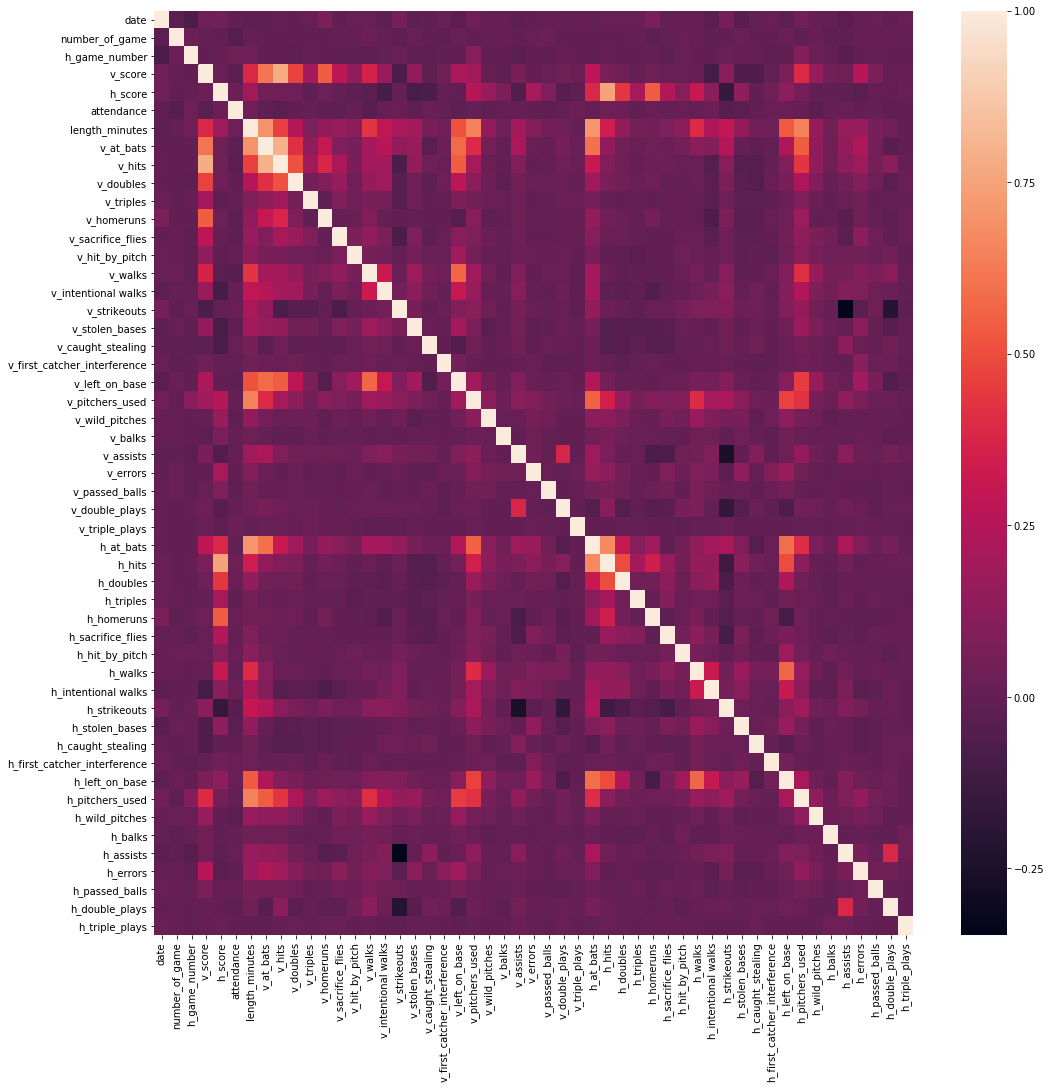

In [32]:
plt.figure(figsize=(17.0, 17.0))
sns.heatmap(baseball_data.corr())

In [33]:
baseball_data.drop(columns=['v_at_bats', 'h_at_bats'], inplace=True)

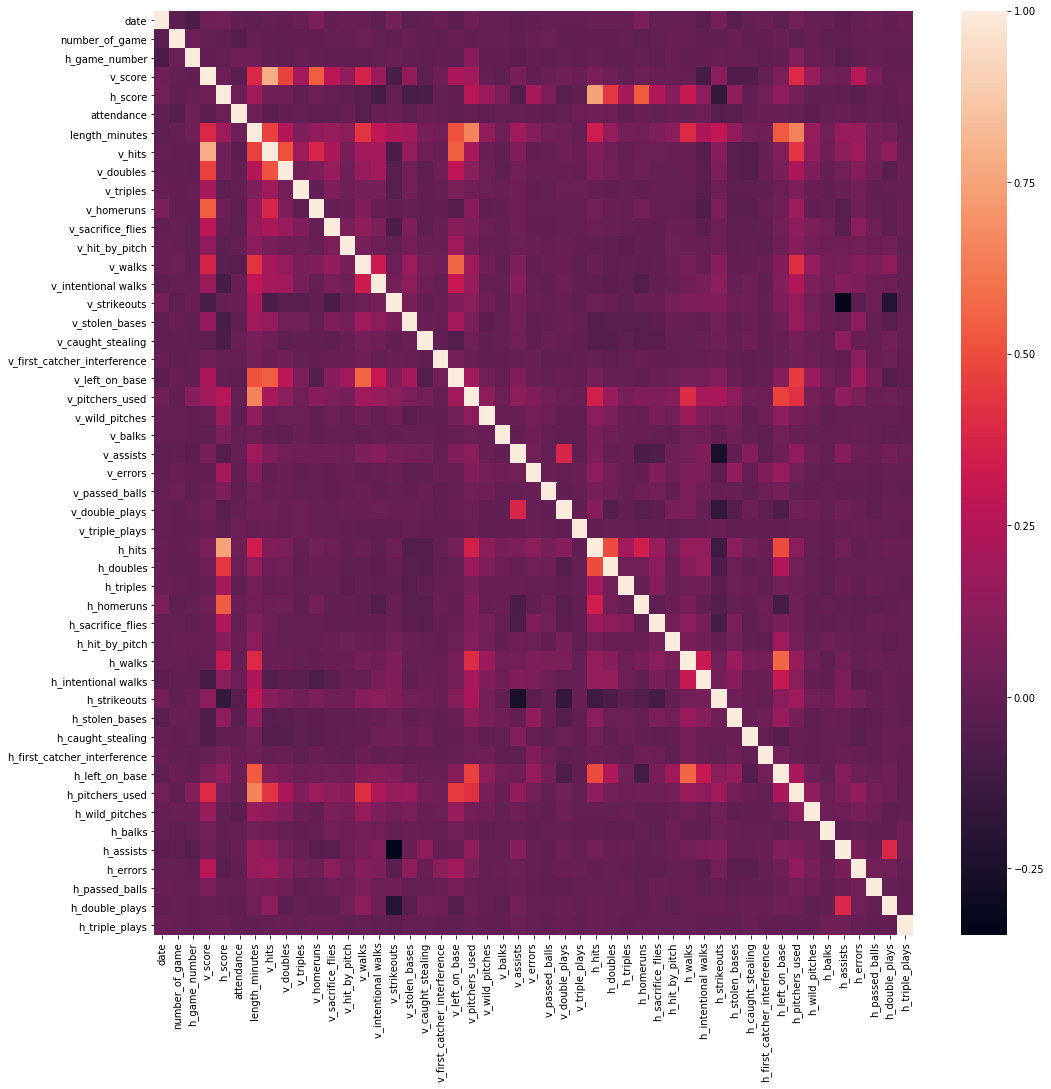

In [34]:
plt.figure(figsize=(17.0, 17.0))
sns.heatmap(baseball_data.corr())

In [35]:
baseball_data.columns

Index(['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_caught_stealing', 'v_first_catcher_interference',
       'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches', 'v_balks',
       'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays',
       'v_triple_plays', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing',
       'h_first_catcher_interference', 'h_left_on_base', 'h_pitchers_used',
       'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors', 'h_passed_balls',
       'h_double_plays', 'h_triple

In [36]:
baseball_data['v_caught_stealing'].value_counts()

0.0    7999
1.0    1776
2.0     208
3.0      14
Name: v_caught_stealing, dtype: int64

In [37]:
def setter1(x):
    if x > 0:
        return 'Yes'
    else:
        return 'No'
baseball_data['V_Caught_Stealing'] = baseball_data['v_caught_stealing'].apply(setter1)
baseball_data['H_Caught_Stealing'] = baseball_data['h_caught_stealing'].apply(setter1)
baseball_data.drop(columns=['v_caught_stealing', 'h_caught_stealing'], inplace=True)
baseball_data.head()

,date,number_of_game,day_of_week,v_name,v_league,h_name,h_league,h_game_number,v_score,h_score,...,hp_umpire_name,v_manager_name,h_manager_name,winning_pitcher_name,losing_pitcher_name,saving_pitcher_name,v_starting_pitcher_name,h_starting_pitcher_name,V_Caught_Stealing,H_Caught_Stealing
0,20120913,0,Thu,SLN,NL,LAN,NL,144,2,1,...,Doug Eddings,Mike Matheny,Don Mattingly,Lance Lynn,Paco Rodriguez,Jason Motte,Lance Lynn,Josh Beckett,No,Yes
1,20120914,0,Fri,DET,AL,CLE,AL,145,4,0,...,Wally Bell,Jim Leyland,Manny Acta,Justin Verlander,Corey Kluber,(none),Justin Verlander,Corey Kluber,No,No
2,20120914,0,Fri,ANA,AL,KCA,AL,144,9,7,...,D.J. Reyburn,Mike Scioscia,Ned Yost,Jordan Walden,Tim Collins,Ernesto Frieri,C.J. Wilson,Bruce Chen,No,No
3,20120914,0,Fri,CHA,AL,MIN,AL,145,6,0,...,Jordan Baker,Robin Ventura,Ron Gardenhire,Chris Sale,Esmerling Vasquez,(none),Chris Sale,Esmerling Vasquez,No,No
4,20120914,0,Fri,TBA,AL,NYA,AL,144,6,4,...,Scott Barry,Joe Maddon,Joe Girardi,David Price,CC Sabathia,Fernando Rodney,David Price,CC Sabathia,No,No


In [38]:
baseball_data.columns

Index(['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_first_catcher_interference', 'v_left_on_base',
       'v_pitchers_used', 'v_wild_pitches', 'v_balks', 'v_assists', 'v_errors',
       'v_passed_balls', 'v_double_plays', 'v_triple_plays', 'h_hits',
       'h_doubles', 'h_triples', 'h_homeruns', 'h_sacrifice_flies',
       'h_hit_by_pitch', 'h_walks', 'h_intentional walks', 'h_strikeouts',
       'h_stolen_bases', 'h_first_catcher_interference', 'h_left_on_base',
       'h_pitchers_used', 'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors',
       'h_passed_balls', 'h_double_plays', 'h_triple_plays', 'hp_umpire_name',
       'v_manager_name

In [39]:
baseball_data['saving_pitcher_name'].value_counts()

(none)             4751
Craig Kimbrel       174
Kenley Jansen       155
Mark Melancon       147
Aroldis Chapman     146
                   ... 
Dan Jennings          1
Bryan Morris          1
Shae Simmons          1
A.J. Cole             1
Matt Barnes           1
Name: saving_pitcher_name, Length: 341, dtype: int64

In [40]:
def setter2(y):
    if y == '(none)':
        return 'No'
    else:
        return 'Yes'
baseball_data['Saved'] = baseball['saving_pitcher_name'].apply(setter2)
baseball_data.drop(columns='saving_pitcher_name', inplace=True)

In [41]:
baseball_data['Saved'].value_counts()

Yes    9465
No      532
Name: Saved, dtype: int64

In [42]:
baseball_data['date'].astype(object)

0       20120913
1       20120914
2       20120914
3       20120914
4       20120914
          ...   
9995    20161002
9996    20161002
9997    20161002
9998    20161002
9999    20161002
Name: date, Length: 9997, dtype: object

In [43]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
not_large_month = ['February', 'April', 'June', 'September', 'November']
def setter3(z):
    z = str(z)
    if z[4] == '0':
        if z[6:8] == '31' and month[int(z[5])] in not_large_month:
            return np.NaN
        else:
            return month[int(z[5])] + ' ' + z[6:8] + ', ' + z[:4]
    else:
        if z[6:8] == '31' and month[int(z[4:6])] in not_large_month:
            return np.NaN
        else:
            return month[int(z[4:6])] + ' ' + z[6:8] + ', ' + z[:4]
baseball_data['Date'] = baseball_data['date'].apply(setter3)
baseball_data['Date'].value_counts()

October 30, 2015      18
October 19, 2012      17
August 30, 2013       17
September 30, 2014    17
July 02, 2015         17
                      ..
April 23, 2014         1
April 22, 2014         1
October 30, 2013       1
April 30, 2014         1
May 05, 2015           1
Name: Date, Length: 730, dtype: int64

In [44]:
baseball_data['Date'].unique()

array(['October 13, 2012', 'October 14, 2012', 'October 15, 2012',
       'October 16, 2012', 'October 17, 2012', 'October 18, 2012',
       'October 19, 2012', 'October 20, 2012', 'October 21, 2012',
       'October 22, 2012', 'October 23, 2012', 'October 24, 2012',
       'October 25, 2012', 'October 26, 2012', 'October 27, 2012',
       'October 28, 2012', 'October 29, 2012', 'October 30, 2012',
       'November 01, 2012', 'November 02, 2012', 'November 03, 2012', nan,
       'May 01, 2013', 'May 02, 2013', 'May 03, 2013', 'May 04, 2013',
       'May 05, 2013', 'May 06, 2013', 'May 07, 2013', 'May 08, 2013',
       'May 09, 2013', 'May 10, 2013', 'May 11, 2013', 'May 12, 2013',
       'May 13, 2013', 'May 14, 2013', 'May 15, 2013', 'May 16, 2013',
       'May 17, 2013', 'May 18, 2013', 'May 19, 2013', 'May 20, 2013',
       'May 21, 2013', 'May 22, 2013', 'May 23, 2013', 'May 24, 2013',
       'May 25, 2013', 'May 26, 2013', 'May 27, 2013', 'May 28, 2013',
       'May 29, 2013', 'Ma

In [45]:
baseball_data.dropna(subset = ['Date'], inplace=True)

In [46]:
baseball_data['Date'].astype('datetime64[ns]')

0      2012-10-13
1      2012-10-14
2      2012-10-14
3      2012-10-14
4      2012-10-14
          ...    
9995   2016-11-02
9996   2016-11-02
9997   2016-11-02
9998   2016-11-02
9999   2016-11-02
Name: Date, Length: 9866, dtype: datetime64[ns]

In [47]:
baseball_data.drop(columns='date', inplace=True)

In [48]:
baseball_data.columns

Index(['number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_first_catcher_interference', 'v_left_on_base',
       'v_pitchers_used', 'v_wild_pitches', 'v_balks', 'v_assists', 'v_errors',
       'v_passed_balls', 'v_double_plays', 'v_triple_plays', 'h_hits',
       'h_doubles', 'h_triples', 'h_homeruns', 'h_sacrifice_flies',
       'h_hit_by_pitch', 'h_walks', 'h_intentional walks', 'h_strikeouts',
       'h_stolen_bases', 'h_first_catcher_interference', 'h_left_on_base',
       'h_pitchers_used', 'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors',
       'h_passed_balls', 'h_double_plays', 'h_triple_plays', 'hp_umpire_name',
       'v_manager_name', 'h_ma

In [49]:
baseball_data['h_score'].dtype

dtype('int64')

In [50]:
baseball_data['Home_Team_Outcome'] = baseball_data['h_score'] - baseball_data['v_score']
baseball_data['Home_Team_Outcome']

0      -1
1      -4
2      -2
3      -6
4      -2
       ..
9995   -2
9996    3
9997    6
9998    6
9999    3
Name: Home_Team_Outcome, Length: 9866, dtype: int64

In [51]:
def setter4(w):
    if w < 0:
        return 'Defeat'
    else:
        return 'Victory'
baseball_data['Home_Team_Outcome'] = baseball_data['Home_Team_Outcome'].apply(setter4)
baseball_data['Home_Team_Outcome']

0        Defeat
1        Defeat
2        Defeat
3        Defeat
4        Defeat
         ...   
9995     Defeat
9996    Victory
9997    Victory
9998    Victory
9999    Victory
Name: Home_Team_Outcome, Length: 9866, dtype: object

In [52]:
baseball_data['Home_Team_Outcome'].value_counts()

Victory    5272
Defeat     4594
Name: Home_Team_Outcome, dtype: int64

In [53]:
baseball_data.columns

Index(['number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_first_catcher_interference', 'v_left_on_base',
       'v_pitchers_used', 'v_wild_pitches', 'v_balks', 'v_assists', 'v_errors',
       'v_passed_balls', 'v_double_plays', 'v_triple_plays', 'h_hits',
       'h_doubles', 'h_triples', 'h_homeruns', 'h_sacrifice_flies',
       'h_hit_by_pitch', 'h_walks', 'h_intentional walks', 'h_strikeouts',
       'h_stolen_bases', 'h_first_catcher_interference', 'h_left_on_base',
       'h_pitchers_used', 'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors',
       'h_passed_balls', 'h_double_plays', 'h_triple_plays', 'hp_umpire_name',
       'v_manager_name', 'h_ma

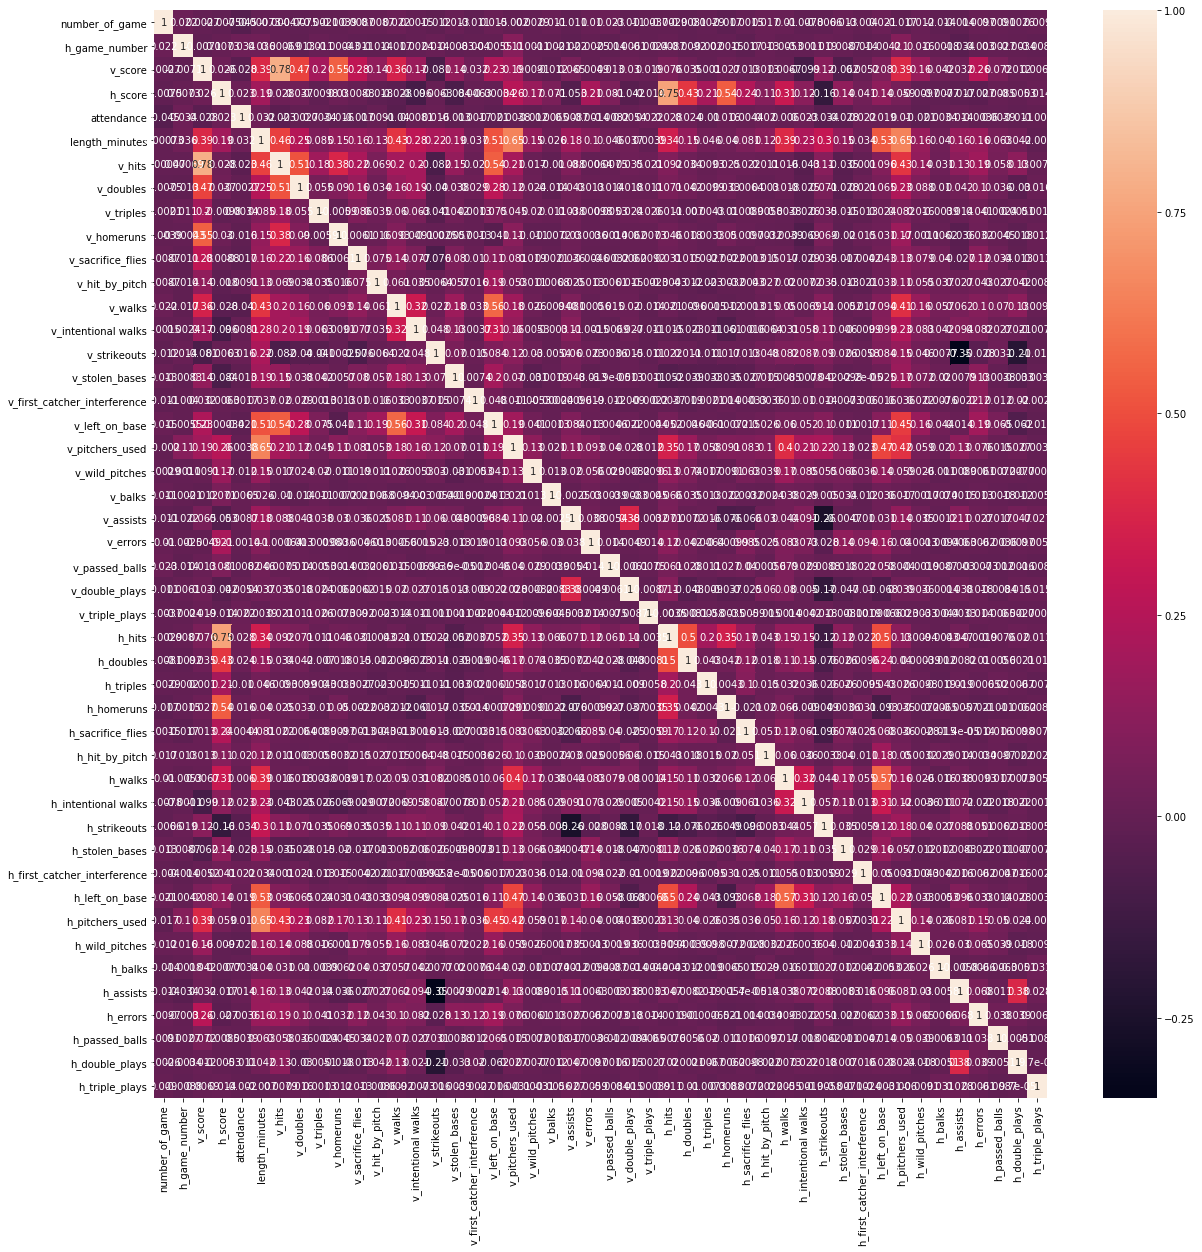

In [54]:
plt.figure(figsize=(20.0, 20.0))
sns.heatmap(baseball_data.corr(), annot=True)

In [55]:
#The following features don't really have a relation to the outcome

In [56]:
baseball_data.drop(columns=['h_first_catcher_interference', 'v_first_catcher_interference'], inplace=True)

In [57]:
baseball_data.columns

Index(['number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches',
       'v_balks', 'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays',
       'v_triple_plays', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_left_on_base', 'h_pitchers_used',
       'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors', 'h_passed_balls',
       'h_double_plays', 'h_triple_plays', 'hp_umpire_name', 'v_manager_name',
       'h_manager_name', 'winning_pitcher_name', 'losing_pitcher_name',
       'v_s

In [58]:
#baseball_data.drop(columns=['v_game_number', 'h_game_number'], inplace=True)

In [59]:
baseball_data['losing_pitcher_name'].value_counts()['R.A. Dickey']

52

In [60]:
baseball_data['losing_pitcher_name'].value_counts().sum()/len(baseball_data['losing_pitcher_name'].value_counts())

10.223834196891191

In [61]:
len(baseball_data['losing_pitcher_name'].value_counts() < 4)

965

In [62]:
def setter5(q):
    if baseball_data['losing_pitcher_name'].value_counts()[q] < 3:
        return 'Another'
    else:
        return q
baseball_data['Losing Pitcher Name'] = baseball_data['losing_pitcher_name'].apply(setter5)
baseball_data['Losing Pitcher Name'].value_counts()

Another            365
R.A. Dickey         52
Ian Kennedy         50
Jeff Samardzija     49
Chris Archer        48
                  ... 
James McDonald       3
Alex Meyer           3
Blake Parker         3
Jason Berken         3
David Aardsma        3
Name: Losing Pitcher Name, Length: 703, dtype: int64

In [63]:
baseball_data.drop(columns='losing_pitcher_name', inplace=True)

In [64]:
baseball_data['winning_pitcher_name'].value_counts()

Max Scherzer         73
Clayton Kershaw      67
Zack Greinke         65
Madison Bumgarner    65
David Price          62
                     ..
Gabriel Ynoa          1
Jason Garcia          1
Josh Lindblom         1
Clayton Mortensen     1
J.R. Graham           1
Name: winning_pitcher_name, Length: 895, dtype: int64

In [65]:
def setter6(p):
    if baseball_data['winning_pitcher_name'].value_counts()[p] < 3:
        return 'Another'
    else:
        return p
baseball_data['Winning Pitcher Name'] = baseball_data['winning_pitcher_name'].apply(setter6)
baseball_data['Winning Pitcher Name'].value_counts()

Another              330
Max Scherzer          73
Clayton Kershaw       67
Madison Bumgarner     65
Zack Greinke          65
                    ... 
Donn Roach             3
Yimi Garcia            3
Sean Gilmartin         3
Brian Schlitter        3
Darin Downs            3
Name: Winning Pitcher Name, Length: 647, dtype: int64

In [66]:
baseball_data.drop(columns='winning_pitcher_name', inplace=True)

In [67]:
 baseball_data.columns

Index(['number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches',
       'v_balks', 'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays',
       'v_triple_plays', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_left_on_base', 'h_pitchers_used',
       'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors', 'h_passed_balls',
       'h_double_plays', 'h_triple_plays', 'hp_umpire_name', 'v_manager_name',
       'h_manager_name', 'v_starting_pitcher_name', 'h_starting_pitcher_name',
    

In [68]:
baseball_data['h_starting_pitcher_name'].value_counts()

Edinson Volquez    70
James Shields      69
R.A. Dickey        69
Chris Tillman      68
Jon Lester         67
                   ..
Matt Albers         1
Chris Narveson      1
Yimi Garcia         1
Jake Buchanan       1
Charlie Leesman     1
Name: h_starting_pitcher_name, Length: 509, dtype: int64

In [69]:
def setter8(v):
    if baseball_data['h_starting_pitcher_name'].value_counts()[v] < 3:
        return 'Another'
    else:
        return v
baseball_data['H Starting Pitcher Name'] = baseball_data['h_starting_pitcher_name'].apply(setter8)
baseball_data['H Starting Pitcher Name'].value_counts()

Another            131
Edinson Volquez     70
James Shields       69
R.A. Dickey         69
Chris Tillman       68
                  ... 
Zach Britton         3
Tyler Thornburg      3
Kyle Ryan            3
Manny Banuelos       3
Will Smith           3
Name: H Starting Pitcher Name, Length: 419, dtype: int64

In [70]:
baseball_data.drop(columns='h_starting_pitcher_name', inplace=True)

In [71]:
def setter9(u):
    if baseball_data['v_starting_pitcher_name'].value_counts()[u] < 3:
        return 'Another'
    else:
        return u
baseball_data['V Starting Pitcher Name'] = baseball_data['v_starting_pitcher_name'].apply(setter9)
baseball_data['V Starting Pitcher Name'].value_counts()

Another              148
Max Scherzer          71
Wade Miley            70
Cole Hamels           68
Madison Bumgarner     68
                    ... 
Pat Dean               3
Jeff Hoffman           3
Jeff Manship           3
Chris Devenski         3
Robert Gsellman        3
Name: V Starting Pitcher Name, Length: 416, dtype: int64

In [72]:
baseball_data.columns

Index(['number_of_game', 'day_of_week', 'v_name', 'v_league', 'h_name',
       'h_league', 'h_game_number', 'v_score', 'h_score', 'day_night',
       'attendance', 'length_minutes', 'v_line_score', 'h_line_score',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches',
       'v_balks', 'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays',
       'v_triple_plays', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_left_on_base', 'h_pitchers_used',
       'h_wild_pitches', 'h_balks', 'h_assists', 'h_errors', 'h_passed_balls',
       'h_double_plays', 'h_triple_plays', 'hp_umpire_name', 'v_manager_name',
       'h_manager_name', 'v_starting_pitcher_name', 'V_Caught_Stealing',
       'H_

In [73]:
baseball_data.drop(columns='v_starting_pitcher_name', inplace=True)

In [74]:
#function to work umpire name out
def setter10(f):
    if baseball_data['hp_umpire_name'].value_counts()[f] < 20:
        return 'Another'
    else:
        return f
baseball_data['HP Umpire Name'] = baseball_data['hp_umpire_name'].apply(setter10)
baseball_data['HP Umpire Name'].value_counts()

Bill Miller        133
Joe West           132
Ted Barrett        131
Marvin Hudson      131
Jeff Nelson        130
                  ... 
Gary Darling        37
Tim McClelland      34
Ramon De Jesus      25
Nic Lentz           24
Stu Scheurwater     21
Name: HP Umpire Name, Length: 95, dtype: int64

In [75]:
baseball_data.drop(columns='hp_umpire_name', inplace=True)

In [76]:
#function to work manager name out
def setter11(p):
    if baseball_data['h_manager_name'].value_counts()[p] < 20:
        return 'Another'
    else:
        return p
baseball_data['Hometeam Manager Name'] = baseball_data['h_manager_name'].apply(setter11)
baseball_data['Hometeam Manager Name'].value_counts()

Joe Girardi        333
Ned Yost           333
Bruce Bochy        331
Don Mattingly      329
Mike Matheny       329
Terry Collins      328
Clint Hurdle       328
Mike Scioscia      327
Joe Maddon         327
Robin Ventura      327
Bob Melvin         326
Buck Showalter     323
Terry Francona     319
Walt Weiss         318
John Gibbons       317
John Farrell       305
Fredi Gonzalez     267
Bryan Price        241
Brad Ausmus        239
Buddy Black        201
Ron Roenicke       181
Mike Redmond       177
Ron Gardenhire     168
Kirk Gibson        167
Kevin Cash         162
Matt Williams      161
Paul Molitor       161
Chip Hale          161
Dusty Baker        161
Jeff Banister      160
A.J. Hinch         159
Lloyd McClendon    156
Ron Washington     154
Bo Porter          149
Craig Counsell     146
Ryne Sandberg      140
Pete Mackanin      124
Another            103
Dale Sveum          92
Jim Leyland         90
Davey Johnson       90
Dave Roberts        82
Andy Green          81
Rich Renter

In [77]:
#function to work manager name out
def setter12(x):
    if baseball_data['v_manager_name'].value_counts()[x] < 20:
        return 'Another'
    else:
        return x
baseball_data['Visitant team Manager Name'] = baseball_data['v_manager_name'].apply(setter12)
baseball_data['Visitant team Manager Name'].value_counts()

Buck Showalter     334
Bob Melvin         332
Clint Hurdle       331
Robin Ventura      330
Joe Maddon         330
Mike Matheny       330
Terry Collins      329
Don Mattingly      329
Mike Scioscia      327
Bruce Bochy        327
Joe Girardi        326
Ned Yost           326
John Gibbons       318
Terry Francona     318
Walt Weiss         316
John Farrell       306
Fredi Gonzalez     267
Brad Ausmus        238
Bryan Price        238
Buddy Black        201
Ron Roenicke       182
Mike Redmond       180
Kirk Gibson        168
Ron Gardenhire     167
Dusty Baker        165
Ron Washington     162
A.J. Hinch         161
Jeff Banister      160
Paul Molitor       160
Lloyd McClendon    160
Matt Williams      158
Chip Hale          158
Kevin Cash         158
Craig Counsell     150
Bo Porter          146
Ryne Sandberg      133
Pete Mackanin      123
Another             99
Jim Leyland         90
Davey Johnson       89
Dale Sveum          87
Scott Servais       80
Andy Green          79
Dave Robert

In [78]:
baseball_data.drop(columns=['h_manager_name', 'v_manager_name'], inplace=True)

In [79]:
baseball_data['v_name'].value_counts()

BAL    334
COL    333
MIL    332
PHI    332
OAK    332
BOS    332
HOU    331
PIT    331
ANA    330
NYN    330
CHA    330
SLN    330
TOR    330
ATL    329
CIN    329
SDN    329
SEA    328
TEX    328
DET    328
SFN    328
TBA    327
LAN    327
MIN    327
ARI    326
KCA    326
CHN    326
NYA    326
WAS    326
MIA    325
CLE    324
Name: v_name, dtype: int64

In [80]:
colms = baseball_data.columns.to_list()[11:-12]
colms

['length_minutes',
 'v_line_score',
 'h_line_score',
 'v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_balks',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'v_triple_plays',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_balks',
 'h_assists',
 'h_errors',
 'h_passed_balls',
 'h_double_plays',
 'h_triple_plays']

In [81]:
baseball_data['attendance'].astype('int64')

0       43309
1       17185
2       27586
3       30729
4       45200
        ...  
9995    27762
9996    36935
9997    41445
9998    44615
9999    28730
Name: attendance, Length: 9866, dtype: int64

In [82]:
baseball_data['attendance'].value_counts()

0.0        30
36067.0    23
35067.0    16
20468.0     5
41683.0     4
           ..
25634.0     1
48609.0     1
43731.0     1
32175.0     1
20147.0     1
Name: attendance, Length: 8494, dtype: int64

In [83]:
#Attendance average (mean)
baseball_data['attendance'].sum()/baseball_data.shape[0]

30289.806507196434

{'whiskers': [<matplotlib.lines.Line2D at 0x1d09c310>,
 'caps': [<matplotlib.lines.Line2D at 0x1d09c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d09c2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d09cdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cef2970>],
 'means': []}

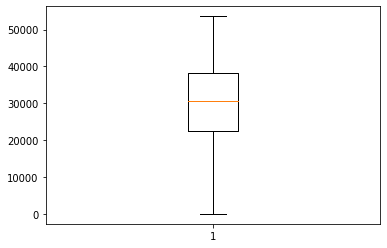

In [84]:
plt.boxplot(baseball_data['attendance'])

In [85]:
#it's affected by the zero values
#two categories (more/less than attendance average) should work, but I'll do four categories (quartiles ranges)

In [86]:
def nullbyzero(z):
    if z == 0.0:
        return np.NaN
    else:
        return z
baseball_data['Attendance'] = baseball_data['attendance'].apply(nullbyzero)

In [87]:
baseball_data['Attendance'].isnull().any()

True

In [88]:
baseball_data.dropna(subset = ['Attendance'], inplace=True)

In [89]:
baseball_data['Attendance'].value_counts()

36067.0    23
35067.0    16
20468.0     5
20387.0     4
41147.0     4
           ..
25634.0     1
48609.0     1
43731.0     1
32175.0     1
10496.0     1
Name: Attendance, Length: 8493, dtype: int64

In [90]:
baseball_data.drop(columns='attendance', inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf143f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf14910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf98af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf14df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf985d0>],
 'means': []}

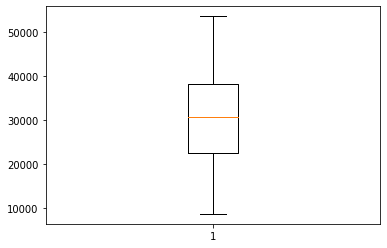

In [91]:
plt.boxplot(baseball_data['Attendance'])

In [92]:
baseball_data['Attendance'].quantile([0.25, 0.5, 0.75])

0.25    22591.75
0.50    30725.50
0.75    38124.75
Name: Attendance, dtype: float64

In [93]:
np.percentile(baseball_data['Attendance'], [25, 50, 75])
max(baseball_data['Attendance'])

53621.0

In [94]:
#Il divide it in four equally grouped categories
def setter14(z):
    if z <= float(np.percentile(baseball_data['Attendance'], 25)):
        return 'Less or equal to '+str(float(np.percentile(baseball_data['Attendance'], 25)))
    elif z <= float(np.percentile(baseball_data['Attendance'], 50)):
        return 'Between '+str(float(np.percentile(baseball_data['Attendance'], 25)))+' and '+str(float(np.percentile(baseball_data['Attendance'], 50)))
    elif z <= float(np.percentile(baseball_data['Attendance'], 75)):
        return 'Between '+str(float(np.percentile(baseball_data['Attendance'], 50)))+' and '+str(float(np.percentile(baseball_data['Attendance'], 75)))
    else:
        return 'Between '+str(float(np.percentile(baseball_data['Attendance'], 75)))+' and '+str(max(baseball_data['Attendance']))

In [95]:
baseball_data['Attendance Ranges'] = baseball_data['Attendance'].apply(setter14)
baseball_data['Attendance Ranges'].value_counts()

Less or equal to 22591.75       2459
Between 22591.75 and 30725.5    2459
Between 38124.75 and 53621.0    2459
Between 30725.5 and 38124.75    2459
Name: Attendance Ranges, dtype: int64

In [96]:
baseball_data.drop(columns='Attendance', inplace=True)

In [97]:
baseball_data['length_minutes']

0       186.0
1       173.0
2       222.0
3       168.0
4       203.0
        ...  
9995    203.0
9996    159.0
9997    184.0
9998    192.0
9999    216.0
Name: length_minutes, Length: 9836, dtype: float64

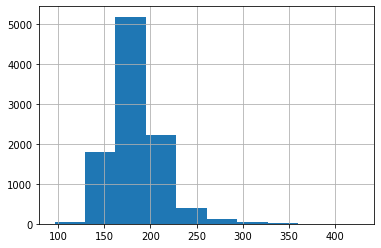

In [98]:
baseball_data['length_minutes'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0e350>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0e870>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf03f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0efb0>],
 'means': []}

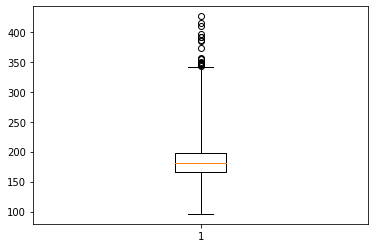

In [99]:
plt.boxplot(baseball_data['length_minutes'], whis=4.50)

In [100]:
lastwhiskermark = float(np.percentile(baseball_data['length_minutes'], 75)) + 4.5*scipy.stats.iqr(baseball_data['length_minutes'])
lastwhiskermark

342.0

In [101]:
count = 0
for length in list(baseball_data['length_minutes']):
    if length > lastwhiskermark:
        count += 1
count

19

In [102]:
#I'll drop this 19 rows which have the outliers

In [103]:
def outliers(x):
    if x > 342.0:
        return np.NaN
    else:
        return x
baseball_data['Game Length (min)'] = baseball_data['length_minutes'].apply(outliers)

In [104]:
baseball_data.dropna(subset=['Game Length (min)'], inplace=True)

In [105]:
baseball_data.drop(columns='length_minutes', inplace=True)

In [106]:
colms.remove('length_minutes')

In [107]:
baseball_data.drop(columns=['v_line_score', 'h_line_score'], inplace=True)

In [108]:
colms = colms[2:]
colms

['v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_balks',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'v_triple_plays',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_balks',
 'h_assists',
 'h_errors',
 'h_passed_balls',
 'h_double_plays',
 'h_triple_plays']

In [109]:
baseball_data['h_triple_plays'].value_counts()

0.0    9806
1.0      11
Name: h_triple_plays, dtype: int64

In [110]:
colms.remove('h_triple_plays')
colms.remove('v_triple_plays')

In [111]:
baseball_data.drop(columns=['h_triple_plays', 'v_triple_plays'], inplace=True)

In [112]:
colms

['v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_balks',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_balks',
 'h_assists',
 'h_errors',
 'h_passed_balls',
 'h_double_plays']

In [113]:
baseball_data['v_errors'].value_counts()

0.0    5566
1.0    3057
2.0     926
3.0     221
4.0      43
5.0       3
6.0       1
Name: v_errors, dtype: int64

In [114]:
def nullbymanyerrors(x):
    if x in [4.0, 5.0, 6.0]:
        return np.NaN
    else:
        return int(x)
    
baseball_data['Hometeam Errors'] = baseball_data['h_errors'].apply(nullbymanyerrors)
baseball_data['Visitant team Errors'] = baseball_data['v_errors'].apply(nullbymanyerrors)

In [115]:
baseball_data.dropna(subset=['Hometeam Errors', 'Visitant team Errors'], inplace=True)

In [116]:
baseball_data.shape

(9717, 62)

In [117]:
baseball_data.drop(columns=['h_errors', 'v_errors'], inplace=True)

In [118]:
colms.remove('h_errors')
colms.remove('v_errors')
colms

['v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_balks',
 'v_assists',
 'v_passed_balls',
 'v_double_plays',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_balks',
 'h_assists',
 'h_passed_balls',
 'h_double_plays']

In [119]:
baseball_data['h_double_plays'].value_counts()

0.0    3774
1.0    3766
2.0    1630
3.0     440
4.0      98
5.0       8
6.0       1
Name: h_double_plays, dtype: int64

In [120]:
def null_by_manydb(x):
    if x == 5.0 or x == 6.0:
        return np.NaN
    else:
        return int(x)
baseball_data['Hometeam Double Plays'] = baseball_data['h_double_plays'].apply(null_by_manydb)
baseball_data['Visitant team Double Plays'] = baseball_data['v_double_plays'].apply(null_by_manydb)
baseball_data.dropna(subset=['Hometeam Double Plays', 'Visitant team Double Plays'], inplace=True)

In [121]:
baseball_data['Hometeam Double Plays'].astype('int64')

0       1
1       0
2       0
3       2
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: Hometeam Double Plays, Length: 9693, dtype: int64

In [122]:
baseball_data['Visitant team Double Plays'].astype('int64')

0       2
1       1
2       0
3       0
4       1
       ..
9995    0
9996    2
9997    0
9998    0
9999    1
Name: Visitant team Double Plays, Length: 9693, dtype: int64

In [123]:
baseball_data.drop(columns=['h_double_plays', 'v_double_plays'], inplace=True)

In [124]:
colms.remove('h_double_plays')
colms.remove('v_double_plays')

In [125]:
colms

['v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_balks',
 'v_assists',
 'v_passed_balls',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_balks',
 'h_assists',
 'h_passed_balls']

In [126]:
baseball_data['v_triples'].value_counts()

0.0    8270
1.0    1268
2.0     141
3.0      11
4.0       2
5.0       1
Name: v_triples, dtype: int64

In [127]:
def null_by_manytriples(x):
    if x in [3.0, 4.0, 5.0]:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Triples'] = baseball_data['h_triples'].apply(null_by_manytriples)
baseball_data['Visitant team Triples'] = baseball_data['v_triples'].apply(null_by_manytriples)
baseball_data.dropna(subset=['Hometeam Triples', 'Visitant team Triples'], inplace=True)

In [128]:
baseball_data.drop(columns=['h_triples', 'v_triples'], inplace=True)

In [129]:
baseball_data['h_passed_balls'].value_counts()

0.0    8993
1.0     632
2.0      30
4.0       3
3.0       2
Name: h_passed_balls, dtype: int64

In [130]:
def null_by_passedballs(x):
    if x in [3.0, 4.0]:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Passed Balls'] = baseball_data['h_passed_balls'].apply(null_by_passedballs)
baseball_data['Visitant team Passed Balls'] = baseball_data['v_passed_balls'].apply(null_by_passedballs)
baseball_data.dropna(subset=['Hometeam Passed Balls', 'Visitant team Passed Balls'], inplace=True)

In [131]:
baseball_data.drop(columns=['h_passed_balls', 'v_passed_balls'], inplace=True)

In [132]:
baseball_data.shape

(9652, 60)

In [133]:
baseball_data['v_balks'].value_counts() #too disparity

0.0    9383
1.0     260
2.0       9
Name: v_balks, dtype: int64

In [134]:
baseball_data.drop(columns=['h_balks', 'v_balks'], inplace=True)

In [135]:
for item in ['h_balks', 'v_balks', 'h_passed_balls', 'v_passed_balls', 'h_triples', 'v_triples']:
    colms.remove(item)
colms

['v_hits',
 'v_doubles',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'v_assists',
 'h_hits',
 'h_doubles',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches',
 'h_assists']

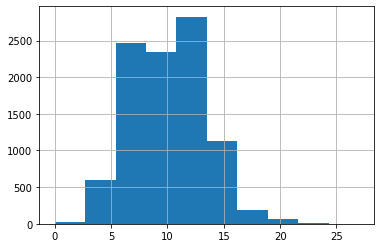

In [136]:
baseball_data['h_assists'].hist()

In [137]:
baseball_data['h_assists'].value_counts()

10.0    1212
11.0    1149
9.0     1125
8.0     1091
12.0     926
7.0      801
13.0     750
6.0      578
14.0     527
15.0     365
5.0      342
16.0     233
4.0      187
17.0     130
18.0      63
3.0       63
19.0      42
20.0      23
2.0       20
21.0       7
23.0       5
22.0       5
1.0        3
0.0        2
27.0       1
26.0       1
24.0       1
Name: h_assists, dtype: int64

In [138]:
def null_by_assist(x):
    for HoV in ['h', 'v']:
        if baseball_data[HoV+'_assists'].value_counts()[x] < 20:
            return np.NaN
        else:
            return x

In [139]:
baseball_data['Hometeam Assists'] = baseball_data['h_assists'].apply(null_by_assist)
baseball_data['Visitant team Assists'] = baseball_data['v_assists'].apply(null_by_assist)

In [140]:
baseball_data['Hometeam Assists'].isnull().any()

True

In [141]:
baseball_data.dropna(subset=['Hometeam Assists', 'Visitant team Assists'], inplace=True)

In [142]:
baseball_data['Hometeam Assists'].astype('int64')
baseball_data['Visitant team Assists'].astype('int64')

0       14
1       10
2       10
3        8
4       12
        ..
9995    12
9996    12
9997     5
9998     2
9999    11
Name: Visitant team Assists, Length: 9609, dtype: int64

In [143]:
baseball_data.drop(columns=['h_assists', 'v_assists'], inplace=True)

In [144]:
colms.remove('h_assists')
colms.remove('v_assists')
colms

['v_hits',
 'v_doubles',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'h_hits',
 'h_doubles',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches']

In [145]:
baseball_data['v_hit_by_pitch'].value_counts()

0.0    6971
1.0    2140
2.0     424
3.0      66
4.0       8
Name: v_hit_by_pitch, dtype: int64

In [146]:
def setter15(x):
    if x == 0.0:
        return 'No HbP'
    else:
        return 'One or more'
baseball_data['Hometeam Hit by Pitch'] = baseball_data['h_hit_by_pitch'].apply(setter15)
baseball_data['Visitant team Hit by Pitch'] = baseball_data['v_hit_by_pitch'].apply(setter15)

In [147]:
baseball_data.drop(columns=['h_hit_by_pitch', 'v_hit_by_pitch'], inplace=True)

In [148]:
colms.remove('h_hit_by_pitch')
colms.remove('v_hit_by_pitch')
colms

['v_hits',
 'v_doubles',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'v_wild_pitches',
 'h_hits',
 'h_doubles',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used',
 'h_wild_pitches']

In [149]:
baseball_data['h_wild_pitches'].value_counts()

0.0    6892
1.0    2189
2.0     438
3.0      80
4.0       8
5.0       2
Name: h_wild_pitches, dtype: int64

In [150]:
def null_by_wp(x):
    if x == 4.0 or x == 5.0:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Wild Pitches'] = baseball_data['h_wild_pitches'].apply(null_by_wp)
baseball_data['Visitant team Wild Pitches'] = baseball_data['v_wild_pitches'].apply(null_by_wp)
baseball_data.dropna(subset=['Hometeam Wild Pitches', 'Visitant team Wild Pitches'], inplace=True)

In [151]:
baseball_data['Hometeam Wild Pitches'].astype('int64')
baseball_data['Visitant team Wild Pitches'].astype('int64')

0       0
1       0
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: Visitant team Wild Pitches, Length: 9588, dtype: int64

In [152]:
colms.remove('h_wild_pitches')
colms.remove('v_wild_pitches')
colms

['v_hits',
 'v_doubles',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'v_pitchers_used',
 'h_hits',
 'h_doubles',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base',
 'h_pitchers_used']

In [153]:
baseball_data.drop(columns=['h_wild_pitches', 'v_wild_pitches'], inplace=True)

In [154]:
baseball_data['v_pitchers_used'].value_counts()

4.0     2885
3.0     2550
5.0     1804
2.0      995
6.0      728
7.0      278
1.0      215
8.0      103
9.0       21
10.0       8
13.0       1
Name: v_pitchers_used, dtype: int64

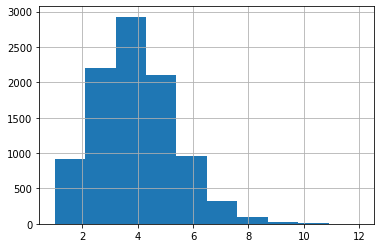

In [155]:
baseball_data['h_pitchers_used'].hist()

In [156]:
def null_by_manypitchers(x):
    if x >= 8.0:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Pitchers Used'] = baseball_data['h_pitchers_used'].apply(null_by_manypitchers)
baseball_data['Visiting team Pitchers Used'] = baseball_data['v_pitchers_used'].apply(null_by_manypitchers)
baseball_data.dropna(subset=['Hometeam Pitchers Used', 'Visiting team Pitchers Used'], inplace=True)

In [157]:
baseball_data.drop(columns=['h_pitchers_used', 'v_pitchers_used'], inplace=True)

In [158]:
baseball_data['v_hits'].value_counts()

8.0     1121
7.0     1100
9.0     1050
6.0      941
10.0     880
5.0      802
11.0     722
12.0     534
4.0      496
13.0     394
3.0      294
14.0     283
15.0     195
16.0     146
2.0      123
17.0      94
18.0      48
1.0       46
19.0      36
20.0      11
21.0      10
22.0       9
0.0        8
23.0       3
26.0       1
24.0       1
Name: v_hits, dtype: int64

In [159]:
baseball_data['v_hits'].value_counts().index.to_list()[-10:]

[18.0, 1.0, 19.0, 20.0, 21.0, 22.0, 0.0, 23.0, 26.0, 24.0]

In [160]:
def null_by_hhits(x):
    if baseball_data['h_hits'].value_counts()[x] < 100:
        return np.NaN
    else:
        return x
def null_by_vhits(y):
    if baseball_data['v_hits'].value_counts()[y] < 100:
        return np.NaN
    else:
        return y
baseball_data['Visiting team Hits'] = baseball_data['v_hits'].apply(null_by_vhits)
baseball_data['Hometeam Hits'] = baseball_data['h_hits'].apply(null_by_hhits)

In [161]:
baseball_data['Hometeam Hits'].isnull().any()

True

In [162]:
baseball_data.dropna(subset=['Hometeam Hits', 'Visiting team Hits'], inplace=True)

In [163]:
baseball_data.shape

(8886, 60)

In [164]:
baseball_data['Hometeam Hits'].astype('int64')
baseball_data['Visiting team Hits'].astype('int64')
baseball_data.drop(columns=['h_hits', 'v_hits'], inplace=True)

In [165]:
for item in ['h_hits', 'v_hits', 'h_pitchers_used', 'v_pitchers_used']:
    colms.remove(item)
colms

['v_doubles',
 'v_homeruns',
 'v_sacrifice_flies',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'h_doubles',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base']

In [166]:
baseball_data['v_doubles'].value_counts()

1.0    2751
2.0    2260
0.0    1806
3.0    1275
4.0     529
5.0     186
6.0      59
7.0      16
8.0       3
9.0       1
Name: v_doubles, dtype: int64

In [167]:
def null_by_doubles(x):
    if x >= 6.0:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Doubles'] = baseball_data['h_doubles'].apply(null_by_doubles)
baseball_data['Visiting team Doubles'] = baseball_data['v_doubles'].apply(null_by_doubles)
baseball_data.dropna(subset=['Hometeam Doubles', 'Visiting team Doubles'], inplace=True)

In [168]:
baseball_data.drop(columns=['h_doubles', 'v_doubles'])
baseball_data['Hometeam Doubles'].astype('int64')
baseball_data['Visiting team Doubles'].astype('int64')
colms.remove('h_doubles')
colms.remove('v_doubles')
colms

['v_homeruns',
 'v_sacrifice_flies',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_walks',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base']

In [169]:
baseball_data['h_walks'].value_counts()

2.0     1857
3.0     1765
1.0     1433
4.0     1324
5.0      845
0.0      610
6.0      482
7.0      238
8.0      120
9.0       39
10.0      17
11.0       6
12.0       1
Name: h_walks, dtype: int64

In [170]:
def null_by_walks(x):
    if x >= 9.0:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Walks'] = baseball_data['h_walks'].apply(null_by_walks)
baseball_data['Visiting team Walks'] = baseball_data['v_walks'].apply(null_by_walks)
baseball_data.dropna(subset=['Hometeam Walks', 'Visiting team Walks'], inplace=True)

In [171]:
baseball_data.drop(columns=['h_walks', 'v_walks'], inplace=True)
colms.remove('h_walks')
colms.remove('v_walks')
colms

['v_homeruns',
 'v_sacrifice_flies',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_left_on_base',
 'h_homeruns',
 'h_sacrifice_flies',
 'h_intentional walks',
 'h_strikeouts',
 'h_stolen_bases',
 'h_left_on_base']

In [172]:
baseball_data['h_homeruns'].value_counts()

0.0    3412
1.0    2985
2.0    1486
3.0     541
4.0     127
5.0      43
6.0       7
7.0       3
Name: h_homeruns, dtype: int64

In [173]:
def null_by_hr(x):
    if x in [5.0, 6.0, 7.0]:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Homeruns'] = baseball_data['h_homeruns'].apply(null_by_hr)
baseball_data['Visiting team Homeruns'] = baseball_data['v_homeruns'].apply(null_by_hr)
baseball_data.dropna(subset=['Hometeam Homeruns', 'Visiting team Homeruns'], inplace=True)

In [174]:
baseball_data.shape

(8504, 62)

In [175]:
baseball_data['Hometeam Homeruns'].astype('int64')
baseball_data['Visiting team Homeruns'].astype('int64')
baseball_data.drop(columns=['h_homeruns', 'v_homeruns'], inplace=True)

In [176]:
baseball_data['v_intentional walks'].value_counts()

0.0    7192
1.0    1151
2.0     143
3.0      16
4.0       2
Name: v_intentional walks, dtype: int64

In [177]:
def null_by_iwalk(x):
    if x in [3.0, 4.0]:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Intentional Walks'] = baseball_data['h_intentional walks'].apply(null_by_iwalk)
baseball_data['Visiting team Intentional Walks'] = baseball_data['v_intentional walks'].apply(null_by_iwalk)
baseball_data.dropna(subset=['Hometeam Intentional Walks', 'Visiting team Intentional Walks'], inplace=True)

In [178]:
baseball_data['Hometeam Intentional Walks'].astype('int64')
baseball_data['Visiting team Intentional Walks'].astype('int64')
baseball_data.drop(columns=['h_intentional walks', 'v_intentional walks'], inplace=True)

In [179]:
baseball_data['v_sacrifice_flies'].value_counts()

0.0    6720
1.0    1548
2.0     182
3.0      13
4.0       2
Name: v_sacrifice_flies, dtype: int64

In [180]:
baseball_data['Hometeam Sacrifice Flies'] = baseball_data['h_sacrifice_flies'].apply(null_by_iwalk)
baseball_data['Visiting team Sacrifice Flies'] = baseball_data['v_sacrifice_flies'].apply(null_by_iwalk)
baseball_data.dropna(subset=['Hometeam Sacrifice Flies', 'Visiting team Sacrifice Flies'], inplace=True)

In [181]:
baseball_data['Hometeam Sacrifice Flies'].astype('int64')
baseball_data['Visiting team Sacrifice Flies'].astype('int64')
baseball_data.drop(columns=['h_sacrifice_flies', 'v_sacrifice_flies'], inplace=True)

In [182]:
baseball_data['v_strikeouts'].value_counts()

8.0     1182
7.0     1148
9.0     1064
6.0     1046
10.0     814
5.0      751
11.0     639
4.0      463
12.0     421
3.0      241
13.0     233
14.0     140
2.0      112
15.0      76
16.0      55
1.0       21
17.0      10
18.0       9
19.0       5
0.0        3
20.0       2
22.0       1
Name: v_strikeouts, dtype: int64

In [183]:
def null_by_hso(x):
    if baseball_data['h_strikeouts'].value_counts()[x] < 20:
        return np.NaN
    else:
        return x
    
def null_by_vso(x):
    if baseball_data['v_strikeouts'].value_counts()[x] < 20:
        return np.NaN
    else:
        return x
    
baseball_data['Hometeam Strikeouts'] = baseball_data['h_strikeouts'].apply(null_by_hso)
baseball_data['Visiting team Strikeouts'] = baseball_data['v_strikeouts'].apply(null_by_vso)

In [184]:
baseball_data.dropna(subset=['Hometeam Strikeouts', 'Visiting team Strikeouts'], inplace=True)

In [185]:
baseball_data.drop(columns=['h_strikeouts', 'v_strikeouts'], inplace=True)

In [186]:
baseball_data['Hometeam Strikeouts'] = baseball_data['Hometeam Strikeouts'].astype('int64')
baseball_data['Visiting team Strikeouts'] = baseball_data['Visiting team Strikeouts'].astype('int64')

In [187]:
baseball_data['v_stolen_bases'].value_counts()

0.0    5327
1.0    2070
2.0     699
3.0     202
4.0      54
5.0      15
6.0       3
7.0       3
Name: v_stolen_bases, dtype: int64

In [188]:
def null_by_sbase(x):
    if x >= 4.0:
        return np.NaN
    else:
        return x
baseball_data['Hometeam Stolen Bases'] = baseball_data['h_stolen_bases'].apply(null_by_sbase)
baseball_data['Visiting team Stolen Bases'] = baseball_data['v_stolen_bases'].apply(null_by_sbase)
baseball_data.dropna(subset=['Hometeam Stolen Bases', 'Visiting team Stolen Bases'], inplace=True)
baseball_data['Hometeam Stolen Bases'] = baseball_data['Hometeam Stolen Bases'].astype('int64')
baseball_data['Visiting team Stolen Bases'] = baseball_data['Visiting team Stolen Bases'].astype('int64')
baseball_data.drop(columns=['h_stolen_bases', 'v_stolen_bases'], inplace=True)
baseball_data.shape

(8220, 60)

In [189]:
baseball_data['h_left_on_base'].value_counts()

6.0     1328
7.0     1282
5.0     1138
8.0     1096
4.0      834
9.0      711
3.0      529
10.0     450
11.0     288
2.0      241
12.0     141
1.0       68
13.0      63
14.0      25
15.0      10
0.0        9
17.0       4
16.0       2
19.0       1
Name: h_left_on_base, dtype: int64

In [190]:
def null_by_hlob(x):
    if baseball_data['h_left_on_base'].value_counts()[x] < 60:
        return np.NaN
    else:
        return x
    
def null_by_vlob(x):
    if baseball_data['v_left_on_base'].value_counts()[x] < 60:
        return np.NaN
    else:
        return x
    
baseball_data['Hometeam LOB'] = baseball_data['h_left_on_base'].apply(null_by_hlob)
baseball_data['Visiting team LOB'] = baseball_data['v_left_on_base'].apply(null_by_vlob)
baseball_data.dropna(subset=['Hometeam LOB', 'Visiting team LOB'], inplace=True)
baseball_data['Hometeam LOB'] = baseball_data['Hometeam LOB'].astype('int64')
baseball_data['Visiting team LOB'] = baseball_data['Visiting team LOB'].astype('int64')
baseball_data.drop(columns=['h_left_on_base', 'v_left_on_base'], inplace=True)
baseball_data.shape

(8023, 60)

In [511]:
#values too spread, so droping decision is made with pitchersname columns
Baseball = baseball_data
Baseball.drop(columns=['Losing Pitcher Name', 'Winning Pitcher Name', 'H Starting Pitcher Name', 'V Starting Pitcher Name'], inplace=True)

In [512]:
Baseball

,v_name,v_league,h_name,h_league,V_Caught_Stealing,H_Caught_Stealing,Saved,Date,Home_Team_Outcome,HP Umpire Name,Hometeam Manager Name,Visitant team Manager Name,Attendance Ranges,Game Length (min),Hometeam Errors,Hometeam Double Plays,Hometeam Triples,Hometeam Passed Balls,Hometeam Assists,Hometeam Hit by Pitch,Visitant team Hit by Pitch,Hometeam Wild Pitches,Hometeam Pitchers Used,Visiting team Pitchers Used,Visiting team Hits,Hometeam Hits,Hometeam Doubles,Visiting team Doubles,Hometeam Walks,Visiting team Walks,Hometeam Homeruns,Visiting team Homeruns,Hometeam Intentional Walks,Visiting team Intentional Walks,Hometeam Sacrifice Flies,Visiting team Sacrifice Flies,Hometeam Strikeouts,Visiting team Strikeouts,Hometeam Stolen Bases,Visiting team Stolen Bases,Hometeam LOB,Visiting team LOB,Visiting team Assists,Visiting team Errors,Visiting team Double Plays,Visiting team Wild Pitches,Visiting team Passed Balls,Visiting team Triples
0,SLN,NL,LAN,NL,No,Yes,No,"October 13, 2012",Defeat,Doug Eddings,Don Mattingly,Mike Matheny,Between 38124.75 and 53621.0,Between 178 and 193,0,1,0,0,10,No HbP,No HbP,1,5,4,10,6,2,2,2,5,0,0,0,2,0,0,8,6,0,0,5,11,14,1,2,0,0,0
1,DET,AL,CLE,AL,No,No,No,"October 14, 2012",Defeat,Wally Bell,Another,Jim Leyland,Less or equal to 22591.75,Between 165 and 178,0,0,0,0,6,One or more,One or more,0,3,3,8,6,2,2,2,2,0,0,0,0,0,0,7,10,0,0,8,6,10,0,1,0,0,0
2,ANA,AL,KCA,AL,No,No,No,"October 14, 2012",Defeat,D.J. Reyburn,Ned Yost,Mike Scioscia,Between 22591.75 and 30725.5,Between 193 and 305.0,1,0,0,0,6,No HbP,One or more,1,6,7,12,8,2,2,3,4,3,1,0,1,1,0,6,10,3,0,5,10,10,1,0,1,0,0
3,CHA,AL,MIN,AL,No,No,No,"October 14, 2012",Defeat,Jordan Baker,Ron Gardenhire,Robin Ventura,Between 30725.5 and 38124.75,Between 165 and 178,0,2,0,0,10,One or more,One or more,0,4,3,9,4,0,1,0,6,0,1,0,0,0,1,7,4,1,1,5,7,8,0,0,0,0,0
4,TBA,AL,NYA,AL,No,No,No,"October 14, 2012",Defeat,Scott Barry,Joe Girardi,Joe Maddon,Between 38124.75 and 53621.0,Between 193 and 305.0,1,1,0,1,13,No HbP,One or more,2,4,3,9,7,0,2,4,2,2,1,0,0,0,0,8,6,0,3,6,7,12,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,MIL,NL,COL,NL,Yes,Yes,Yes,"November 02, 2016",Defeat,Scott Barry,Walt Weiss,Craig Counsell,Between 22591.75 and 30725.5,Between 193 and 305.0,0,0,0,0,13,One or more,One or more,0,5,7,10,13,4,4,3,4,1,2,0,0,0,0,11,12,0,2,12,8,12,1,0,1,0,1
8019,NYN,NL,PHI,NL,Yes,No,Yes,"November 02, 2016",Victory,Lance Barksdale,Pete Mackanin,Terry Collins,Between 30725.5 and 38124.75,Less than or equal to 165,0,1,0,0,7,No HbP,No HbP,0,5,6,8,10,1,3,2,2,0,0,0,0,1,0,3,9,0,1,7,6,12,3,2,0,1,0
8020,LAN,NL,SFN,NL,No,Yes,Yes,"November 02, 2016",Victory,Brian Knight,Bruce Bochy,Dave Roberts,Between 38124.75 and 53621.0,Between 178 and 193,0,1,1,0,7,No HbP,No HbP,0,2,7,4,16,3,0,4,2,0,0,1,0,0,0,11,7,2,0,12,4,5,1,0,0,0,0
8021,PIT,NL,SLN,NL,Yes,No,Yes,"November 02, 2016",Victory,Phil Cuzzi,Mike Matheny,Clint Hurdle,Between 38124.75 and 53621.0,Between 178 and 193,0,1,0,0,7,No HbP,No HbP,0,3,6,9,12,2,0,4,4,1,1,0,0,2,0,5,11,0,0,8,8,2,2,0,0,0,0


In [513]:
Baseball.drop(columns=['number_of_game', 'h_game_number'], inplace=True)

KeyError: "['number_of_game' 'h_game_number'] not found in axis"

In [207]:
Baseball.dtypes

day_of_week                         object
v_name                              object
v_league                            object
h_name                              object
h_league                            object
v_score                              int64
h_score                              int64
day_night                           object
v_doubles                          float64
h_doubles                          float64
V_Caught_Stealing                   object
H_Caught_Stealing                   object
Saved                               object
Date                                object
Home_Team_Outcome                   object
HP Umpire Name                      object
Hometeam Manager Name               object
Visitant team Manager Name          object
Attendance Ranges                   object
Game Length (min)                  float64
Hometeam Errors                    float64
Visitant team Errors               float64
Hometeam Double Plays              float64
Visitant te

In [211]:
for stat in ['Intentional Walks', 'Sacrifice Flies', 'Hits', 'Walks', 'Doubles', 'Homeruns', 'Pitchers Used']:
    Baseball['Hometeam '+stat] = Baseball['Hometeam '+stat].astype('int64')
    Baseball['Visiting team '+stat] = Baseball['Visiting team '+stat].astype('int64')
for stat in ['Assists', 'Errors', 'Double Plays', 'Wild Pitches', 'Passed Balls', 'Triples']:
    Baseball['Visiting team '+stat] = Baseball['Visitant team '+stat].astype('int64')
    Baseball['Hometeam '+stat] = Baseball['Hometeam '+stat].astype('int64')
    Baseball.drop(columns=['Visitant team '+stat], inplace=True)

In [213]:
Baseball.dtypes

day_of_week                         object
v_name                              object
v_league                            object
h_name                              object
h_league                            object
v_score                              int64
h_score                              int64
day_night                           object
v_doubles                          float64
h_doubles                          float64
V_Caught_Stealing                   object
H_Caught_Stealing                   object
Saved                               object
Date                                object
Home_Team_Outcome                   object
HP Umpire Name                      object
Hometeam Manager Name               object
Visitant team Manager Name          object
Attendance Ranges                   object
Game Length (min)                  float64
Hometeam Errors                      int64
Hometeam Double Plays                int64
Hometeam Triples                     int64
Hometeam Pa

In [517]:
Baseball.drop(columns=['h_doubles', 'v_doubles'], inplace=True)

In [228]:
Baseball['Game Length (min)'].value_counts()

175.0    181
173.0    170
180.0    162
182.0    161
185.0    160
        ... 
124.0      1
115.0      1
278.0      1
101.0      1
263.0      1
Name: Game Length (min), Length: 165, dtype: int64

In [229]:
Baseball['Game Length (min)'].value_counts().any()%2 != 0

True

In [224]:
sum(Baseball['Game Length (min)'].value_counts().index.to_list())/Baseball.shape[0]

4.029041505671195

In [232]:
np.percentile(Baseball['Game Length (min)'], [25, 50, 75])

array([165., 178., 193.])

In [234]:
def val_setter(x):
    if x <= 165.0:
        return 'Less than or equal to 165'
    elif x <= 178.0:
        return 'Between 165 and 178'
    elif x <= 193.0:
        return 'Between 178 and 193'
    else:
        return 'Between 193 and '+str(max(Baseball['Game Length (min)']))
        

In [235]:
Baseball['Game Length (min)'] = Baseball['Game Length (min)'].apply(val_setter)

In [236]:
Baseball.drop(columns=['v_score', 'h_score'], inplace=True)

In [241]:
Baseball.reset_index(inplace=True)

In [242]:
Baseball.drop(columns='index', inplace=True)

In [246]:
pd.set_option('display.max_columns', None)

In [369]:
Baseball.to_csv('test')

In [348]:
#It is going to be tested if the day of the week is important for the outcome

In [478]:
'''seball['New'] = np.where(Baseball['Home_Team_Outcome']== 'Victory' , 1, 0)

b1 = Baseball.pivot_table(index=['h_name'], columns=['day_of_week'], values=['New'], aggfunc='sum')
b1 = b1['New'].reset_index(drop=False)
b1 = b1.head(5)
b2 = Baseball.pivot_table(index=['h_name'], columns=['day_of_week'], values=['Home_Team_Outcome'], aggfunc='count')
b2 = b2['Home_Team_Outcome'].reset_index()
b2 = b2.head(5)

sns.barplot(x="h_name", y="Fri", data=b2)

sns.barplot(x="h_name", y="Fri", data=b1)

b1.columns.to_list()

for day in b1.columns.to_list():
    b1[day+'_W'] = b1[day]
    b1.drop(columns=day, inplace=True)
    
b3 = pd.concat([b1, b2], axis =1)
b3 = b3.drop('h_name', axis=1)
b3 = b3[['h_name_W','Fri_W', 'Fri']]

sns.barplot(x='h_name_W', y='Fri_W', data=b3)'''

'seball[\'New\'] = np.where(Baseball[\'Home_Team_Outcome\']== \'Victory\' , 1, 0)\n\nb1 = Baseball.pivot_table(index=[\'h_name\'], columns=[\'day_of_week\'], values=[\'New\'], aggfunc=\'sum\')\nb1 = b1[\'New\'].reset_index(drop=False)\nb1 = b1.head(5)\nb2 = Baseball.pivot_table(index=[\'h_name\'], columns=[\'day_of_week\'], values=[\'Home_Team_Outcome\'], aggfunc=\'count\')\nb2 = b2[\'Home_Team_Outcome\'].reset_index()\nb2 = b2.head(5)\n\nsns.barplot(x="h_name", y="Fri", data=b2)\n\nsns.barplot(x="h_name", y="Fri", data=b1)\n\nb1.columns.to_list()\n\nfor day in b1.columns.to_list():\n    b1[day+\'_W\'] = b1[day]\n    b1.drop(columns=day, inplace=True)\n    \nb3 = pd.concat([b1, b2], axis =1)\nb3 = b3.drop(\'h_name\', axis=1)\nb3 = b3[[\'h_name_W\',\'Fri_W\', \'Fri\']]\n\nsns.barplot(x=\'h_name_W\', y=\'Fri_W\', data=b3)'

In [601]:
list(np.unique(Baseball.sort_values('h_name')['h_name'].values))[:3]

In [598]:
Baseball.sort_values('h_name').reset_index()['h_name'][0]

In [486]:
ordered_teams = list(np.unique(Baseball.sort_values('h_name')['h_name'].values))
counter = 0
for n in range(Baseball.shape[0]):
    counter += 1
    if Baseball.sort_values('h_name').reset_index()['h_name'][n] == ordered_teams[8]:
        break
counter

2122

In [479]:
testing_df = Baseball[['h_name', 'day_of_week', 'Home_Team_Outcome']].sort_values('h_name').head(counter-1)
testing_df

,h_name,day_of_week,Home_Team_Outcome
1439,ANA,Wed,Victory
4902,ANA,Fri,Victory
3588,ANA,Fri,Defeat
2758,ANA,Sat,Defeat
1017,ANA,Fri,Victory
...,...,...,...
2449,BAL,Fri,Defeat
1295,BAL,Mon,Defeat
2460,BAL,Sat,Victory
610,BAL,Tue,Victory


In [480]:
testing_df['outcome'] = np.where(testing_df['Home_Team_Outcome'] == 'Victory', 1, 0)
testing_df.drop(columns='Home_Team_Outcome', inplace=True)
testing_df

,h_name,day_of_week,outcome
1439,ANA,Wed,1
4902,ANA,Fri,1
3588,ANA,Fri,0
2758,ANA,Sat,0
1017,ANA,Fri,1
...,...,...,...
2449,BAL,Fri,0
1295,BAL,Mon,0
2460,BAL,Sat,1
610,BAL,Tue,1


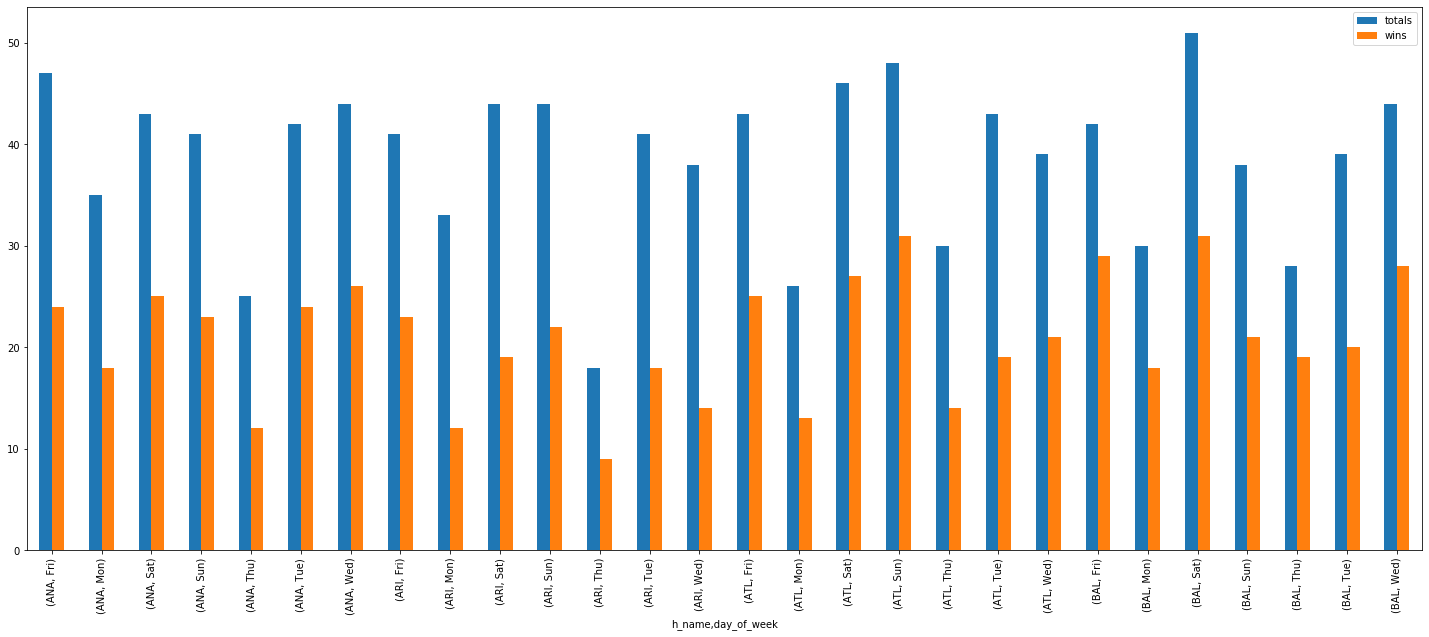

In [481]:
testing_df1 = testing_df.groupby(['h_name', 'day_of_week']).agg('count')
testing_df1['totals'] = testing_df1['outcome']
testing_df1['wins'] = testing_df.groupby(['h_name', 'day_of_week']).agg('sum')['outcome']
testing_df1.drop(columns='outcome', inplace=True)
testing_df1.plot.bar(figsize=[25.0, 10.0]) #counter for 4 - four teams

In [ ]:
#This plot suggests that the day of the week is not really important for the outcome, due to the shown 
#cases -first four team (ANA, ARI, ATL, BAL)- where the wins are approximately the half of the total games

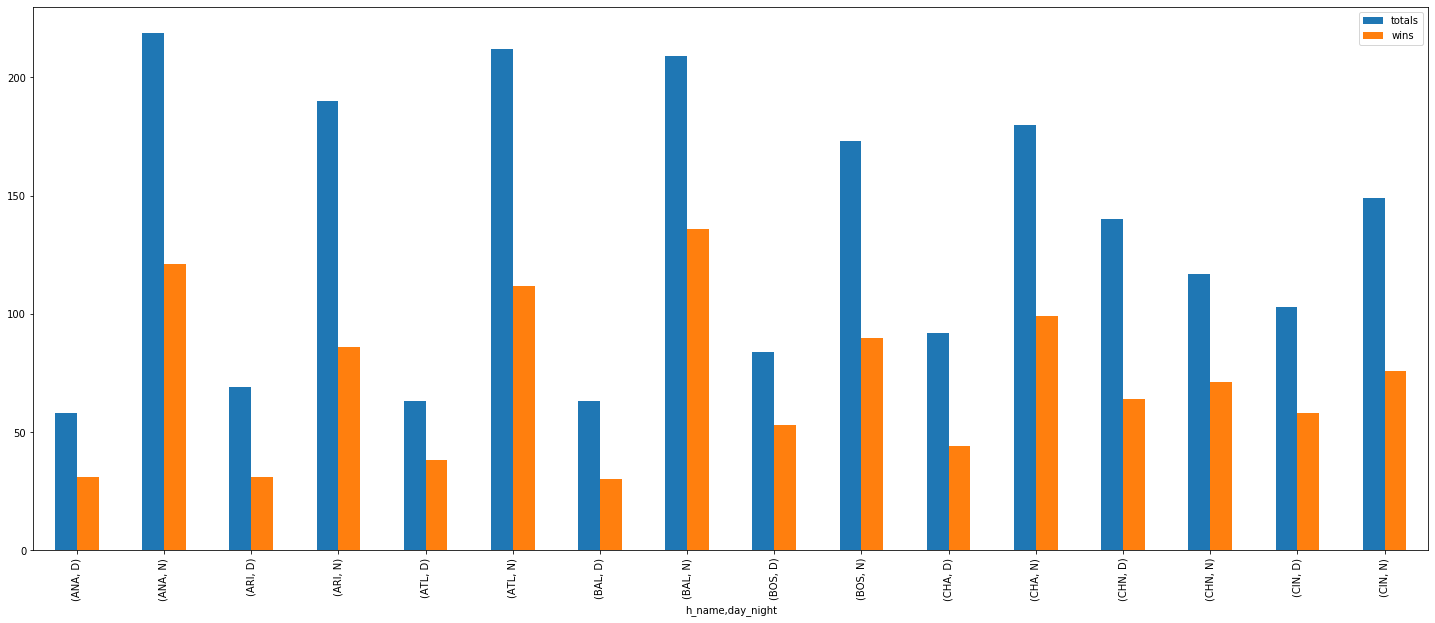

In [487]:
testing_df2 = Baseball[['h_name', 'day_night', 'Home_Team_Outcome']].sort_values('h_name').head(counter-1)
testing_df2['outcome'] = np.where(testing_df2['Home_Team_Outcome'] == 'Victory', 1, 0)
testing_df2.drop(columns='Home_Team_Outcome', inplace=True)
testing_df3 = testing_df2.groupby(['h_name', 'day_night']).agg('count')
testing_df3['totals'] = testing_df3['outcome']
testing_df3['wins'] = testing_df2.groupby(['h_name', 'day_night']).agg('sum')['outcome']
testing_df3.drop(columns='outcome', inplace=True)
testing_df3.plot.bar(figsize=[25.0, 10.0]) #counter for 8 - eight teams

In [505]:
#It is almost the same situation as before with the days of the week
w=Baseball.sort_values('h_name')['h_name'].reset_index().drop(columns='index')
w

,h_name
0,ANA
1,ANA
2,ANA
3,ANA
4,ANA
...,...
8018,WAS
8019,WAS
8020,WAS
8021,WAS


In [496]:
pd.DataFrame(Baseball['h_name'].value_counts()).reset_index()

,index,h_name
0,SLN,290
1,MIL,279
2,MIA,278
3,KCA,278
4,LAN,278
5,DET,277
6,ANA,277
7,OAK,276
8,ATL,275
9,TBA,274


In [507]:
w[:277]

,h_name
0,ANA
1,ANA
2,ANA
3,ANA
4,ANA
...,...
272,ANA
273,ANA
274,ANA
275,ANA


In [494]:
for ind in range(len(w[:277])):
    if Baseball['day_night'][ind] == 'D':
        counting

SLN    290
MIL    279
MIA    278
KCA    278
LAN    278
DET    277
ANA    277
OAK    276
ATL    275
TBA    274
CHA    272
BAL    272
SDN    272
MIN    271
SEA    271
HOU    269
TEX    269
NYA    268
NYN    268
PHI    267
WAS    266
CLE    263
SFN    263
ARI    259
CHN    257
BOS    257
PIT    255
CIN    252
TOR    250
COL    220
Name: h_name, dtype: int64

In [508]:
Baseball.drop(columns=['day_of_week', 'day_night'], inplace=True)

In [518]:
Baseball

,v_name,v_league,h_name,h_league,V_Caught_Stealing,H_Caught_Stealing,Saved,Date,Home_Team_Outcome,HP Umpire Name,Hometeam Manager Name,Visitant team Manager Name,Attendance Ranges,Game Length (min),Hometeam Errors,Hometeam Double Plays,Hometeam Triples,Hometeam Passed Balls,Hometeam Assists,Hometeam Hit by Pitch,Visitant team Hit by Pitch,Hometeam Wild Pitches,Hometeam Pitchers Used,Visiting team Pitchers Used,Visiting team Hits,Hometeam Hits,Hometeam Doubles,Visiting team Doubles,Hometeam Walks,Visiting team Walks,Hometeam Homeruns,Visiting team Homeruns,Hometeam Intentional Walks,Visiting team Intentional Walks,Hometeam Sacrifice Flies,Visiting team Sacrifice Flies,Hometeam Strikeouts,Visiting team Strikeouts,Hometeam Stolen Bases,Visiting team Stolen Bases,Hometeam LOB,Visiting team LOB,Visiting team Assists,Visiting team Errors,Visiting team Double Plays,Visiting team Wild Pitches,Visiting team Passed Balls,Visiting team Triples
0,SLN,NL,LAN,NL,No,Yes,No,"October 13, 2012",Defeat,Doug Eddings,Don Mattingly,Mike Matheny,Between 38124.75 and 53621.0,Between 178 and 193,0,1,0,0,10,No HbP,No HbP,1,5,4,10,6,2,2,2,5,0,0,0,2,0,0,8,6,0,0,5,11,14,1,2,0,0,0
1,DET,AL,CLE,AL,No,No,No,"October 14, 2012",Defeat,Wally Bell,Another,Jim Leyland,Less or equal to 22591.75,Between 165 and 178,0,0,0,0,6,One or more,One or more,0,3,3,8,6,2,2,2,2,0,0,0,0,0,0,7,10,0,0,8,6,10,0,1,0,0,0
2,ANA,AL,KCA,AL,No,No,No,"October 14, 2012",Defeat,D.J. Reyburn,Ned Yost,Mike Scioscia,Between 22591.75 and 30725.5,Between 193 and 305.0,1,0,0,0,6,No HbP,One or more,1,6,7,12,8,2,2,3,4,3,1,0,1,1,0,6,10,3,0,5,10,10,1,0,1,0,0
3,CHA,AL,MIN,AL,No,No,No,"October 14, 2012",Defeat,Jordan Baker,Ron Gardenhire,Robin Ventura,Between 30725.5 and 38124.75,Between 165 and 178,0,2,0,0,10,One or more,One or more,0,4,3,9,4,0,1,0,6,0,1,0,0,0,1,7,4,1,1,5,7,8,0,0,0,0,0
4,TBA,AL,NYA,AL,No,No,No,"October 14, 2012",Defeat,Scott Barry,Joe Girardi,Joe Maddon,Between 38124.75 and 53621.0,Between 193 and 305.0,1,1,0,1,13,No HbP,One or more,2,4,3,9,7,0,2,4,2,2,1,0,0,0,0,8,6,0,3,6,7,12,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,MIL,NL,COL,NL,Yes,Yes,Yes,"November 02, 2016",Defeat,Scott Barry,Walt Weiss,Craig Counsell,Between 22591.75 and 30725.5,Between 193 and 305.0,0,0,0,0,13,One or more,One or more,0,5,7,10,13,4,4,3,4,1,2,0,0,0,0,11,12,0,2,12,8,12,1,0,1,0,1
8019,NYN,NL,PHI,NL,Yes,No,Yes,"November 02, 2016",Victory,Lance Barksdale,Pete Mackanin,Terry Collins,Between 30725.5 and 38124.75,Less than or equal to 165,0,1,0,0,7,No HbP,No HbP,0,5,6,8,10,1,3,2,2,0,0,0,0,1,0,3,9,0,1,7,6,12,3,2,0,1,0
8020,LAN,NL,SFN,NL,No,Yes,Yes,"November 02, 2016",Victory,Brian Knight,Bruce Bochy,Dave Roberts,Between 38124.75 and 53621.0,Between 178 and 193,0,1,1,0,7,No HbP,No HbP,0,2,7,4,16,3,0,4,2,0,0,1,0,0,0,11,7,2,0,12,4,5,1,0,0,0,0
8021,PIT,NL,SLN,NL,Yes,No,Yes,"November 02, 2016",Victory,Phil Cuzzi,Mike Matheny,Clint Hurdle,Between 38124.75 and 53621.0,Between 178 and 193,0,1,0,0,7,No HbP,No HbP,0,3,6,9,12,2,0,4,4,1,1,0,0,2,0,5,11,0,0,8,8,2,2,0,0,0,0


[]

In [540]:
ct_cols = []
for i in range(Baseball.shape[1]):
    if pd.DataFrame(Baseball.dtypes).reset_index()[0][i] == 'object':
        ct_cols.append(pd.DataFrame(Baseball.dtypes).reset_index()['index'][i])
ct_cols

['v_name',
 'v_league',
 'h_name',
 'h_league',
 'V_Caught_Stealing',
 'H_Caught_Stealing',
 'Saved',
 'Date',
 'Home_Team_Outcome',
 'HP Umpire Name',
 'Hometeam Manager Name',
 'Visitant team Manager Name',
 'Attendance Ranges',
 'Game Length (min)',
 'Hometeam Hit by Pitch',
 'Visitant team Hit by Pitch']

In [547]:
ct_cols.remove('Home_Team_Outcome')

In [542]:
n_cols = [col for col in list(Baseball.columns) if col not in ct_cols]
n_cols

['Hometeam Errors',
 'Hometeam Double Plays',
 'Hometeam Triples',
 'Hometeam Passed Balls',
 'Hometeam Assists',
 'Hometeam Wild Pitches',
 'Hometeam Pitchers Used',
 'Visiting team Pitchers Used',
 'Visiting team Hits',
 'Hometeam Hits',
 'Hometeam Doubles',
 'Visiting team Doubles',
 'Hometeam Walks',
 'Visiting team Walks',
 'Hometeam Homeruns',
 'Visiting team Homeruns',
 'Hometeam Intentional Walks',
 'Visiting team Intentional Walks',
 'Hometeam Sacrifice Flies',
 'Visiting team Sacrifice Flies',
 'Hometeam Strikeouts',
 'Visiting team Strikeouts',
 'Hometeam Stolen Bases',
 'Visiting team Stolen Bases',
 'Hometeam LOB',
 'Visiting team LOB',
 'Visiting team Assists',
 'Visiting team Errors',
 'Visiting team Double Plays',
 'Visiting team Wild Pitches',
 'Visiting team Passed Balls',
 'Visiting team Triples']

In [548]:
#Categorical Data
C_Baseball = pd.DataFrame(columns=ct_cols, data=Baseball)
#Numerical Data
N_Baseball = pd.DataFrame(columns=n_cols, data=Baseball)
N_Baseball

,Hometeam Errors,Hometeam Double Plays,Hometeam Triples,Hometeam Passed Balls,Hometeam Assists,Hometeam Wild Pitches,Hometeam Pitchers Used,Visiting team Pitchers Used,Visiting team Hits,Hometeam Hits,Hometeam Doubles,Visiting team Doubles,Hometeam Walks,Visiting team Walks,Hometeam Homeruns,Visiting team Homeruns,Hometeam Intentional Walks,Visiting team Intentional Walks,Hometeam Sacrifice Flies,Visiting team Sacrifice Flies,Hometeam Strikeouts,Visiting team Strikeouts,Hometeam Stolen Bases,Visiting team Stolen Bases,Hometeam LOB,Visiting team LOB,Visiting team Assists,Visiting team Errors,Visiting team Double Plays,Visiting team Wild Pitches,Visiting team Passed Balls,Visiting team Triples
0,0,1,0,0,10,1,5,4,10,6,2,2,2,5,0,0,0,2,0,0,8,6,0,0,5,11,14,1,2,0,0,0
1,0,0,0,0,6,0,3,3,8,6,2,2,2,2,0,0,0,0,0,0,7,10,0,0,8,6,10,0,1,0,0,0
2,1,0,0,0,6,1,6,7,12,8,2,2,3,4,3,1,0,1,1,0,6,10,3,0,5,10,10,1,0,1,0,0
3,0,2,0,0,10,0,4,3,9,4,0,1,0,6,0,1,0,0,0,1,7,4,1,1,5,7,8,0,0,0,0,0
4,1,1,0,1,13,2,4,3,9,7,0,2,4,2,2,1,0,0,0,0,8,6,0,3,6,7,12,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0,0,0,0,13,0,5,7,10,13,4,4,3,4,1,2,0,0,0,0,11,12,0,2,12,8,12,1,0,1,0,1
8019,0,1,0,0,7,0,5,6,8,10,1,3,2,2,0,0,0,0,1,0,3,9,0,1,7,6,12,3,2,0,1,0
8020,0,1,1,0,7,0,2,7,4,16,3,0,4,2,0,0,1,0,0,0,11,7,2,0,12,4,5,1,0,0,0,0
8021,0,1,0,0,7,0,3,6,9,12,2,0,4,4,1,1,0,0,2,0,5,11,0,0,8,8,2,2,0,0,0,0


In [573]:
C_Baseball.drop(columns='Date', inplace=True)

In [574]:
dummy_data = pd.get_dummies(C_Baseball)

In [575]:
dummy_data

,v_name_ANA,v_name_ARI,v_name_ATL,v_name_BAL,v_name_BOS,v_name_CHA,v_name_CHN,v_name_CIN,v_name_CLE,v_name_COL,v_name_DET,v_name_HOU,v_name_KCA,v_name_LAN,v_name_MIA,v_name_MIL,v_name_MIN,v_name_NYA,v_name_NYN,v_name_OAK,v_name_PHI,v_name_PIT,v_name_SDN,v_name_SEA,v_name_SFN,v_name_SLN,v_name_TBA,v_name_TEX,v_name_TOR,v_name_WAS,v_league_AL,v_league_NL,h_name_ANA,h_name_ARI,h_name_ATL,h_name_BAL,h_name_BOS,h_name_CHA,h_name_CHN,h_name_CIN,h_name_CLE,h_name_COL,h_name_DET,h_name_HOU,h_name_KCA,h_name_LAN,h_name_MIA,h_name_MIL,h_name_MIN,h_name_NYA,h_name_NYN,h_name_OAK,h_name_PHI,h_name_PIT,h_name_SDN,h_name_SEA,h_name_SFN,h_name_SLN,h_name_TBA,h_name_TEX,h_name_TOR,h_name_WAS,h_league_AL,h_league_NL,V_Caught_Stealing_No,V_Caught_Stealing_Yes,H_Caught_Stealing_No,H_Caught_Stealing_Yes,Saved_No,Saved_Yes,HP Umpire Name_Adam Hamari,HP Umpire Name_Adrian Johnson,HP Umpire Name_Alan Porter,HP Umpire Name_Alfonso Marquez,HP Umpire Name_Andy Fletcher,HP Umpire Name_Angel Hernandez,HP Umpire Name_Another,HP Umpire Name_Ben May,HP Umpire Name_Bill Miller,HP Umpire Name_Bill Welke,HP Umpire Name_Bob Davidson,HP Umpire Name_Brian Gorman,HP Umpire Name_Brian Knight,HP Umpire Name_Brian O'Nora,HP Umpire Name_Bruce Dreckman,HP Umpire Name_CB Bucknor,HP Umpire Name_Carlos Torres,HP Umpire Name_Chad Fairchild,HP Umpire Name_Chris Conroy,HP Umpire Name_Chris Guccione,HP Umpire Name_Chris Segal,HP Umpire Name_Clint Fagan,HP Umpire Name_Cory Blaser,HP Umpire Name_D.J. Reyburn,HP Umpire Name_Dale Scott,HP Umpire Name_Dan Bellino,HP Umpire Name_Dan Iassogna,HP Umpire Name_Dana DeMuth,HP Umpire Name_David Rackley,HP Umpire Name_Doug Eddings,HP Umpire Name_Ed Hickox,HP Umpire Name_Eric Cooper,HP Umpire Name_Fieldin Culbreth,HP Umpire Name_Gabe Morales,HP Umpire Name_Gary Cederstrom,HP Umpire Name_Gary Darling,HP Umpire Name_Gerry Davis,HP Umpire Name_Greg Gibson,HP Umpire Name_Hunter Wendelstedt,HP Umpire Name_James Hoye,HP Umpire Name_Jeff Kellogg,HP Umpire Name_Jeff Nelson,HP Umpire Name_Jerry Layne,HP Umpire Name_Jerry Meals,HP Umpire Name_Jim Joyce,HP Umpire Name_Jim Reynolds,HP Umpire Name_Jim Wolf,HP Umpire Name_Joe West,HP Umpire Name_John Hirschbeck,HP Umpire Name_John Tumpane,HP Umpire Name_Jordan Baker,HP Umpire Name_Kerwin Danley,HP Umpire Name_Lance Barksdale,HP Umpire Name_Lance Barrett,HP Umpire Name_Larry Vanover,HP Umpire Name_Laz Diaz,HP Umpire Name_Manny Gonzalez,HP Umpire Name_Mark Carlson,HP Umpire Name_Mark Ripperger,HP Umpire Name_Mark Wegner,HP Umpire Name_Marty Foster,HP Umpire Name_Marvin Hudson,HP Umpire Name_Mike DiMuro,HP Umpire Name_Mike Estabrook,HP Umpire Name_Mike Everitt,HP Umpire Name_Mike Muchlinski,HP Umpire Name_Mike Winters,HP Umpire Name_Nic Lentz,HP Umpire Name_Pat Hoberg,HP Umpire Name_Paul Emmel,HP Umpire Name_Paul Nauert,HP Umpire Name_Paul Schrieber,HP Umpire Name_Phil Cuzzi,HP Umpire Name_Quinn Wolcott,HP Umpire Name_Ramon De Jesus,HP Umpire Name_Rob Drake,HP Umpire Name_Ron Kulpa,HP Umpire Name_Ryan Blakney,HP Umpire Name_Sam Holbrook,HP Umpire Name_Scott Barry,HP Umpire Name_Sean Barber,HP Umpire Name_Stu Scheurwater,HP Umpire Name_Ted Barrett,HP Umpire Name_Tim McClelland,HP Umpire Name_Tim Timmons,HP Umpire Name_Tim Welke,HP Umpire Name_Toby Basner,HP Umpire Name_Todd Tichenor,HP Umpire Name_Tom Hallion,HP Umpire Name_Tom Woodring,HP Umpire Name_Tony Randazzo,HP Umpire Name_Tripp Gibson,HP Umpire Name_Vic Carapazza,HP Umpire Name_Wally Bell,HP Umpire Name_Will Little,Hometeam Manager Name_A.J. Hinch,Hometeam Manager Name_Andy Green,Hometeam Manager Name_Another,Hometeam Manager Name_Bo Porter,Hometeam Manager Name_Bob Melvin,Hometeam Manager Name_Brad Ausmus,Hometeam Manager Name_Brian Snitker,Hometeam Manager Name_Bruce Bochy,Hometeam Manager Name_Bryan Price,Hometeam Manager Name_Buck Showalter,Hometeam Manager Name_Buddy Black,Hometeam Manager Name_Charlie Manuel,Hometeam Manager Name_Chip Hale,Hometeam Manager Name_Clint Hurdle,Hometeam Manager Name_Craig Counsell,Hometeam Manager Name_Dale Sveum,

In [554]:
#It is being used Standardization
from sklearn import preprocessing
stand_data = preprocessing.scale(N_Baseball)
stand_data

array([[-0.71967559,  0.12910285, -0.42072053, ..., -0.57748359,
        -0.24789693, -0.38243742],
       [-0.71967559, -0.99309886, -0.42072053, ..., -0.57748359,
        -0.24789693, -0.38243742],
       [ 0.62373001, -0.99309886, -0.42072053, ...,  1.0672274 ,
        -0.24789693, -0.38243742],
       ...,
       [-0.71967559,  0.12910285,  1.94800987, ..., -0.57748359,
        -0.24789693, -0.38243742],
       [-0.71967559,  0.12910285, -0.42072053, ..., -0.57748359,
        -0.24789693, -0.38243742],
       [-0.71967559,  0.12910285, -0.42072053, ...,  1.0672274 ,
        -0.24789693,  2.17234643]])

In [576]:
x = pd.concat([dummy_data, N_Baseball], axis=1)
y = Baseball['Home_Team_Outcome']

In [577]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [580]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
classification = model.fit(x_train, y_train)
y_pred = classification.predict(x_test)
print(classification.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9613707165109034
0.9613707165109034


array([[682,  33],
       [ 29, 861]], dtype=int64)

In [581]:
probabilities = classification.predict_proba(x_test)
probabilities

array([[2.58108074e-03, 9.97418919e-01],
       [1.44303563e-05, 9.99985570e-01],
       [2.25081276e-03, 9.97749187e-01],
       ...,
       [9.99993223e-01, 6.77709632e-06],
       [2.38474569e-04, 9.99761525e-01],
       [3.92580224e-05, 9.99960742e-01]])

In [582]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
lb = LabelBinarizer()
Y_binary = lb.fit_transform(y_test)
Y_binary

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

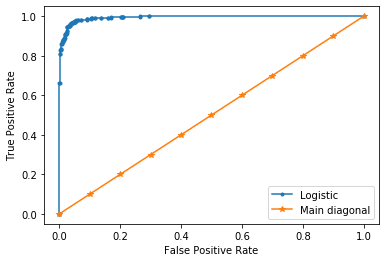

In [585]:
from sklearn.metrics import roc_curve, roc_auc_score
probabilities_positives = probabilities[:, 1]
lr_auc = roc_auc_score(Y_binary, probabilities_positives)
fpr, tpr, thresholds = roc_curve(Y_binary, probabilities_positives)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), marker='*', label='Main diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [589]:
roc_auc_score(Y_binary, probabilities_positives)

0.9936732929991356